In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Problem 1 - Define the problem and perform Exploratory Data Analysis
#### - Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables

### Data Dictionary
 - Timestamp : Time & Date of the ad published
 - InventoryType : Type of Inventory
 - Ad - Length : Length of the ad, assumed in pixels 
 - Ad- Width : Width of the ad, assumed in pixels 
 - Ad Size : Size of the ad
 - Ad Type : Type of ad
 - Platform : Platform the ad is being published
 - Device Type : Type of device the ad is being shown
 - Format : Format in which ad is being shown
 - Available_Impressions : Total no. times ad is shown
 - Matched_Queries : Total no. of enquiries
 - Impressions : Total no. of responses
 - Clicks : Total no. of reactions
 - Spend : Total money spent
 - Fee : Fee collected for each add
 - Revenue : Revenue generated from ad
 - CTR : Clickthrough rate, no. of clicks received
 - CPM : cost per mile, cost paid for every 1000 impresions
 - CPC : cost per click

In [2]:
df=pd.read_excel(r"C:\Users\admin\Desktop\Aaryani\Great Learning\4th Month\Project\Clustering+Clean+Ads_Data.xlsx")
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [3]:
# checking the shape of the data
df.shape

(23066, 19)

In [4]:
print("There are 23066 rows & 19 columns in the dataset")

There are 23066 rows & 19 columns in the dataset


In [5]:
# finding dta type of each coloumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

**Observations:**
 
 - There are 23066 observations and 19 columns in the data.
 - columns CTR, CPM, CPC have 4736 null values i.e. there are missing values.
 - All the columns except the Timestamp, InventoryType, Ad Type, Platform, Device Type & Format are numerical.

In [6]:
# Checking for duplicate data

dups = df.duplicated()
df[dups].sum()

Timestamp                  0
InventoryType              0
Ad - Length                0
Ad- Width                  0
Ad Size                    0
Ad Type                    0
Platform                   0
Device Type                0
Format                     0
Available_Impressions      0
Matched_Queries            0
Impressions                0
Clicks                     0
Spend                    0.0
Fee                      0.0
Revenue                  0.0
CTR                      0.0
CPM                      0.0
CPC                      0.0
dtype: object

- There are no duplicate rows in the data.

In [7]:
# Statistical summary of the data
df.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

**Observations:**
 
 - The Ad size varies from 33600 to 216000 with average ad size as 96674.
 - The Available impressions are very high but Matched Queries & Impressions got reduced by 53% & 51% of Available impressions      respectively.
 - While comparing impressions & clicks, clicks is only 1% of impressions.
 - The Amount spent is 126% higher than the revenue.
 - CTR, CPM & CPC are very low w.r.t to all othe parameters.

Ad - Length
Skew : 0.33
Ad- Width
Skew : 0.21
Ad Size
Skew : 1.21


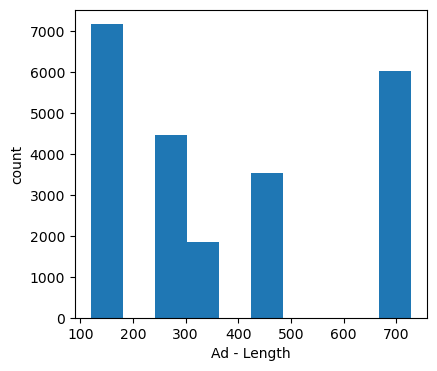

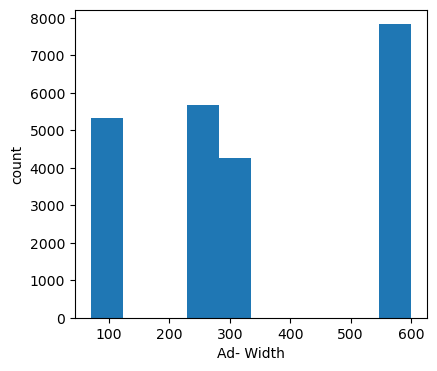

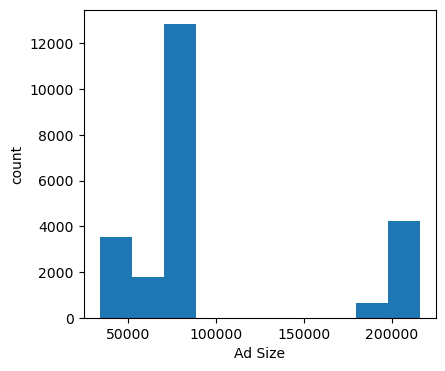

In [56]:
# check the distribution and outliers for each column in the data
for col in df.columns[2:5]:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.xlabel(col)
    plt.ylabel('count')

Available_Impressions
Skew : 3.07
Matched_Queries
Skew : 2.98
Impressions
Skew : 2.97
Clicks
Skew : 2.94
Spend
Skew : 2.58
Fee
Skew : -2.3
Revenue
Skew : 2.79
CTR
Skew : 0.75
CPM
Skew : 0.75
CPC
Skew : 1.85


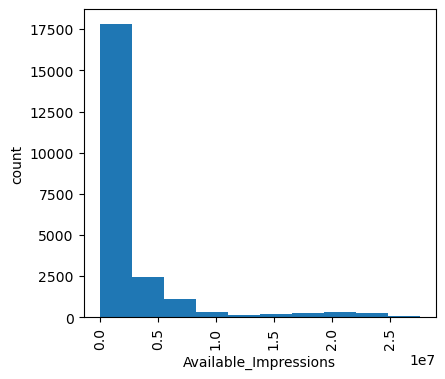

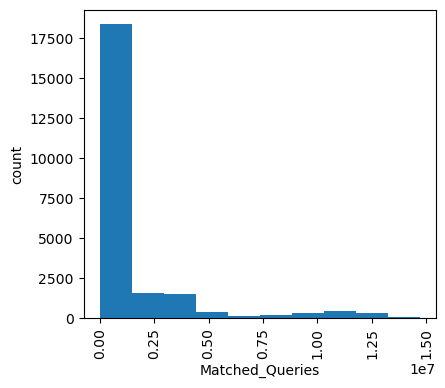

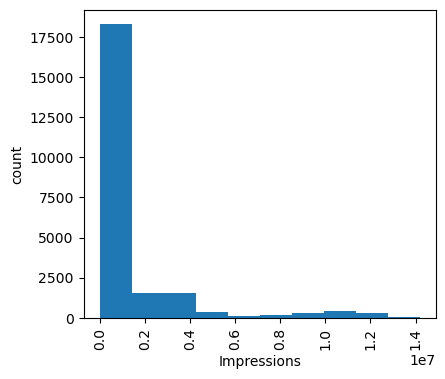

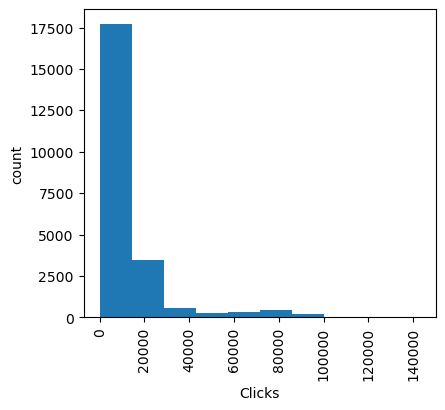

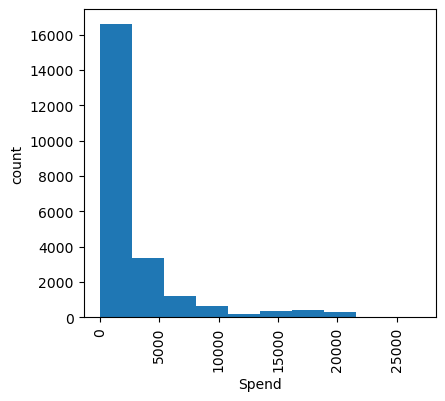

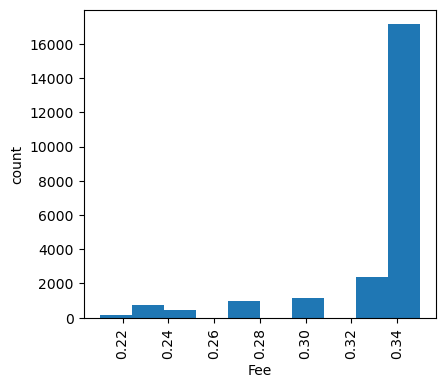

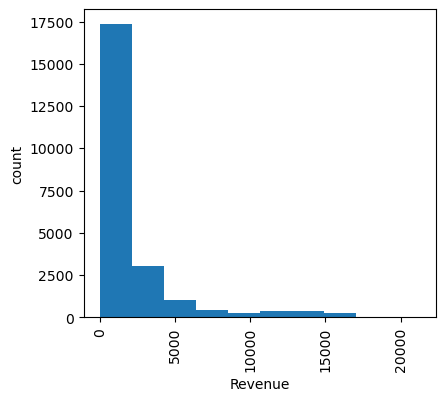

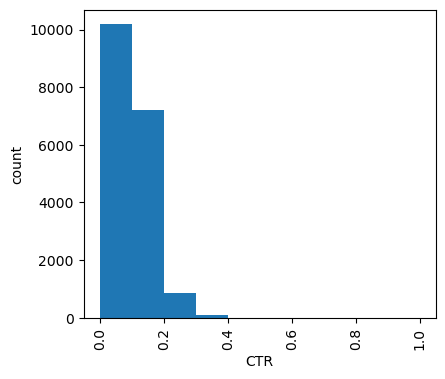

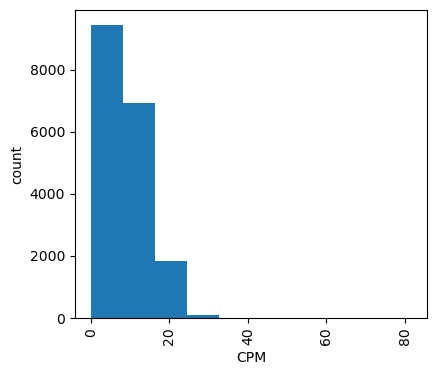

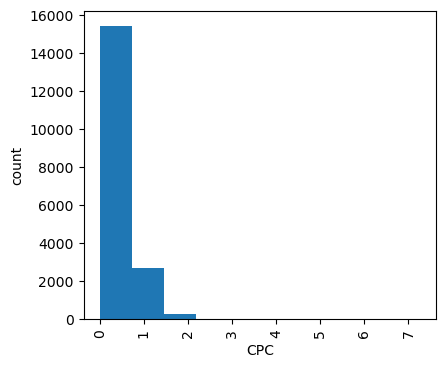

In [58]:
for col in df.columns[9:19]:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)

**Observations:**

- As observed earlier, most of the variables have skewed distributions.
- The distribution for the Ad size, length & width are relatively less skewed with fewer to no outliers.
- The Fee is the only variable which is skewed to the left meaning most of the companies have been successful by achieved high revenue.
- The distribution for all other variables is highly skewed to the right. All these variables have outliers to the right end.

In [7]:
a=df.groupby(['Platform'])['Clicks'].sum()
a

Platform
App       53110133
Video    106162400
Web       87038182
Name: Clicks, dtype: int64

In [40]:
b=df.groupby(['Platform'])['Revenue'].sum().round()
b

Platform
App       9506077.0
Video    19058208.0
Web      15820519.0
Name: Revenue, dtype: float64

In [61]:
c=df.groupby(['Platform'])['Fee'].sum()
c

Platform
App      1656.00
Video    3307.95
Web      2766.00
Name: Fee, dtype: float64

In [43]:
b/a*100 # Revenue/Clicks for Platforms

Platform
App      17.898801
Video    17.951938
Web      18.176527
dtype: float64

In [58]:
c/a # Impressions/Clicks

Platform
App      114.122124
Video    116.024594
Web      117.860903
dtype: float64

In [54]:
d=df.groupby(['Device Type'])['Clicks'].sum()
d

Device Type
Desktop     89065672
Mobile     157245043
Name: Clicks, dtype: int64

In [59]:
e=df.groupby(['Device Type'])['Revenue'].sum().round()
e

Device Type
Desktop    15963612.0
Mobile     28421192.0
Name: Revenue, dtype: float64

In [60]:
e/d*100 # Revenue/Clicks for Device Type

Device Type
Desktop    17.923417
Mobile     18.074460
dtype: float64

In [61]:
f=df.groupby(['Format'])['Clicks'].sum()
f

Format
Display    124114357
Video      122196358
Name: Clicks, dtype: int64

In [64]:
g=df.groupby(['Format'])['Revenue'].sum().round()
g

Format
Display    22229981.0
Video      22154824.0
Name: Revenue, dtype: float64

In [65]:
g/f*100 # Revenue/Clicks for Format

Format
Display    17.910886
Video      18.130511
dtype: float64

In [66]:
h=df.groupby(['Ad Type'])['Clicks'].sum()
h

Ad Type
Inter217    18610979
Inter218    17974707
Inter219    17656628
Inter220    16423061
Inter221    17548231
Inter222    17481442
Inter223    16975859
Inter224    17425929
Inter225    16586081
Inter226    17602354
Inter227    17587195
Inter228    18640075
Inter229    17890694
inter230    17907480
Name: Clicks, dtype: int64

In [67]:
i=df.groupby(['Ad Type'])['Revenue'].sum().round()
i

Ad Type
Inter217    3284376.0
Inter218    3160408.0
Inter219    3170105.0
Inter220    3059844.0
Inter221    3139869.0
Inter222    3173380.0
Inter223    3134330.0
Inter224    3110772.0
Inter225    3056637.0
Inter226    3231198.0
Inter227    3205800.0
Inter228    3350394.0
Inter229    3224979.0
inter230    3082713.0
Name: Revenue, dtype: float64

In [68]:
i/h*100 # Revenue/Clicks for Ad Type

Ad Type
Inter217    17.647519
Inter218    17.582529
Inter219    17.954193
Inter220    18.631387
Inter221    17.892795
Inter222    18.152850
Inter223    18.463454
Inter224    17.851398
Inter225    18.428928
Inter226    18.356624
Inter227    18.228035
Inter228    17.974144
Inter229    18.026014
inter230    17.214667
dtype: float64

In [5]:
j=df['Clicks'].sum()
j

246310715

In [8]:
a/j*100 # Clicks/Total no. of Clicks

Platform
App      21.562250
Video    43.101008
Web      35.336742
Name: Clicks, dtype: float64

In [60]:
df.groupby(['Platform'])['Spend'].sum().round()

Platform
App      13373695.0
Video    26803982.0
Web      22253351.0
Name: Spend, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Inter222'),
  Text(1, 0, 'Inter227'),
  Text(2, 0, 'Inter228'),
  Text(3, 0, 'Inter217'),
  Text(4, 0, 'Inter219'),
  Text(5, 0, 'Inter221'),
  Text(6, 0, 'Inter223'),
  Text(7, 0, 'Inter225'),
  Text(8, 0, 'Inter229'),
  Text(9, 0, 'Inter224'),
  Text(10, 0, 'inter230'),
  Text(11, 0, 'Inter226'),
  Text(12, 0, 'Inter220'),
  Text(13, 0, 'Inter218')])

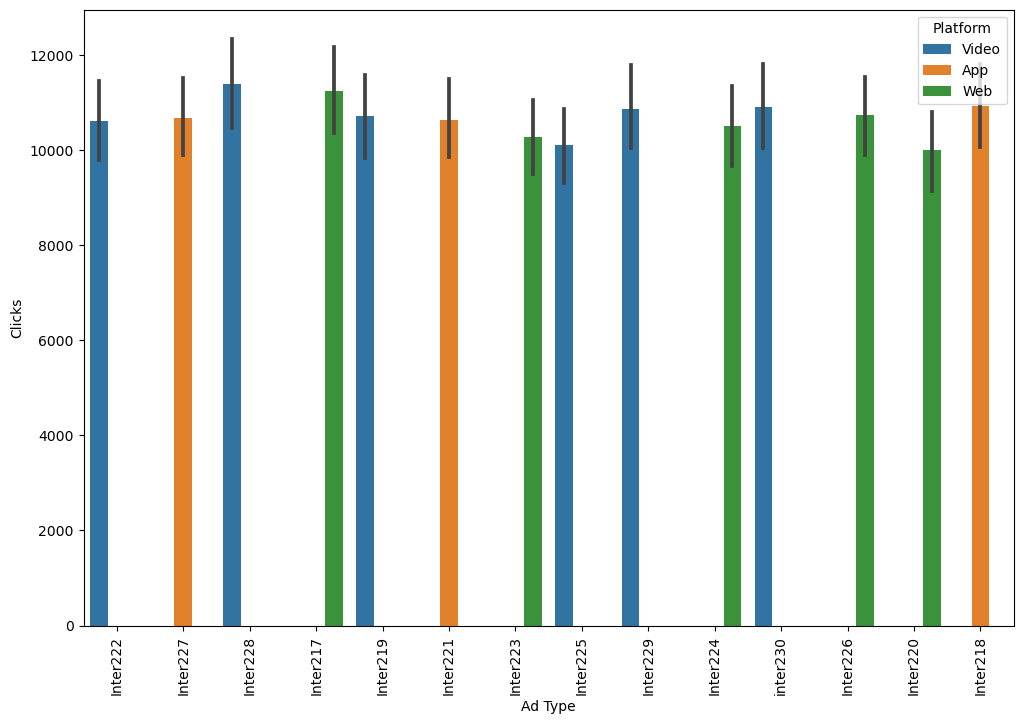

In [238]:
plt.figure(figsize = (12,8))
sns.barplot(data=df, x='Ad Type', y='Clicks', hue='Platform')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Inter222'),
  Text(1, 0, 'Inter227'),
  Text(2, 0, 'Inter228'),
  Text(3, 0, 'Inter217'),
  Text(4, 0, 'Inter219'),
  Text(5, 0, 'Inter221'),
  Text(6, 0, 'Inter223'),
  Text(7, 0, 'Inter225'),
  Text(8, 0, 'Inter229'),
  Text(9, 0, 'Inter224'),
  Text(10, 0, 'inter230'),
  Text(11, 0, 'Inter226'),
  Text(12, 0, 'Inter220'),
  Text(13, 0, 'Inter218')])

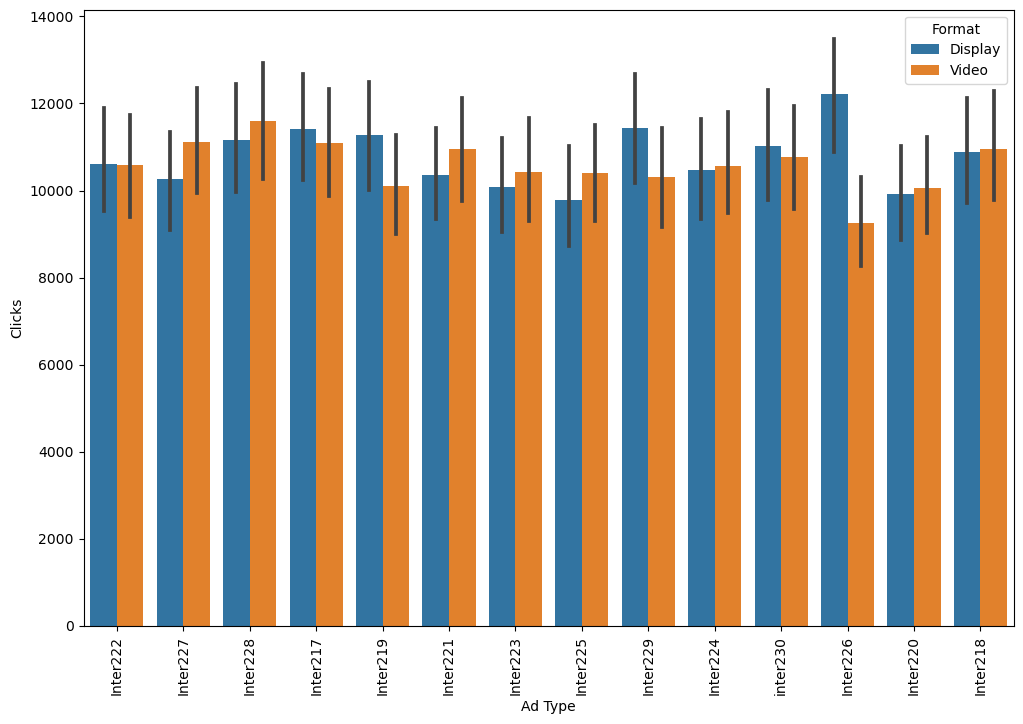

In [239]:
plt.figure(figsize = (12,8))
sns.barplot(data=df, x='Ad Type', y='Clicks', hue='Format')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Inter222'),
  Text(1, 0, 'Inter227'),
  Text(2, 0, 'Inter228'),
  Text(3, 0, 'Inter217'),
  Text(4, 0, 'Inter219'),
  Text(5, 0, 'Inter221'),
  Text(6, 0, 'Inter223'),
  Text(7, 0, 'Inter225'),
  Text(8, 0, 'Inter229'),
  Text(9, 0, 'Inter224'),
  Text(10, 0, 'inter230'),
  Text(11, 0, 'Inter226'),
  Text(12, 0, 'Inter220'),
  Text(13, 0, 'Inter218')])

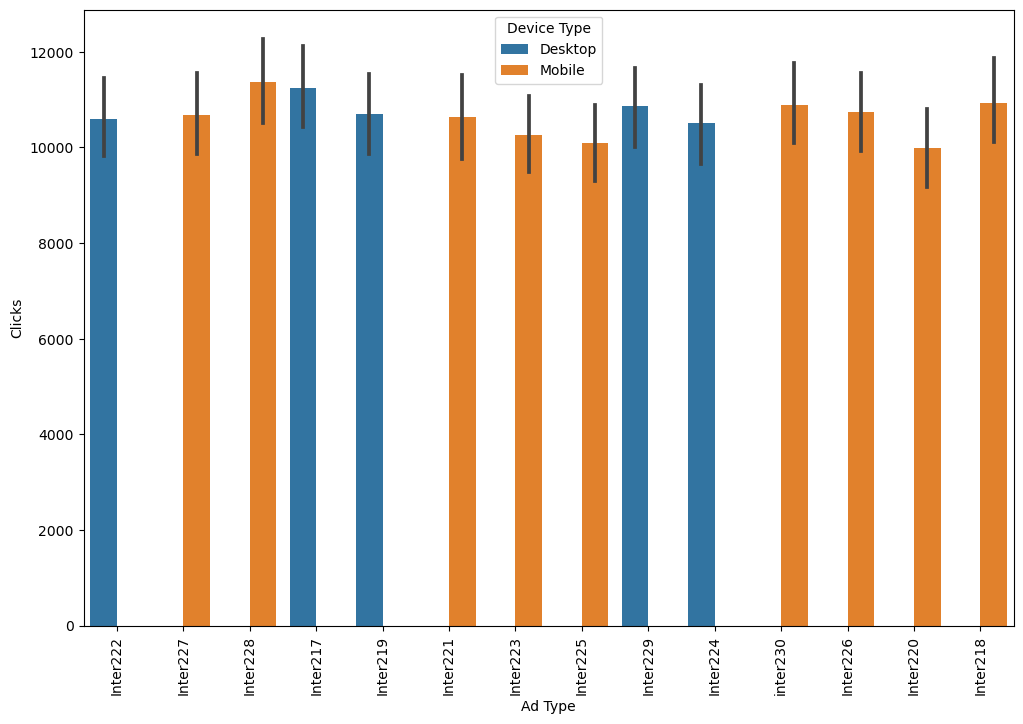

In [240]:
plt.figure(figsize = (12,8))
sns.barplot(data=df, x='Ad Type', y='Clicks', hue='Device Type')
plt.xticks(rotation=90)

In [177]:
df_new = df.drop(columns=["Timestamp", "InventoryType", "Ad Type", "Platform", "Device Type", "Format"])

In [70]:
df_new.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

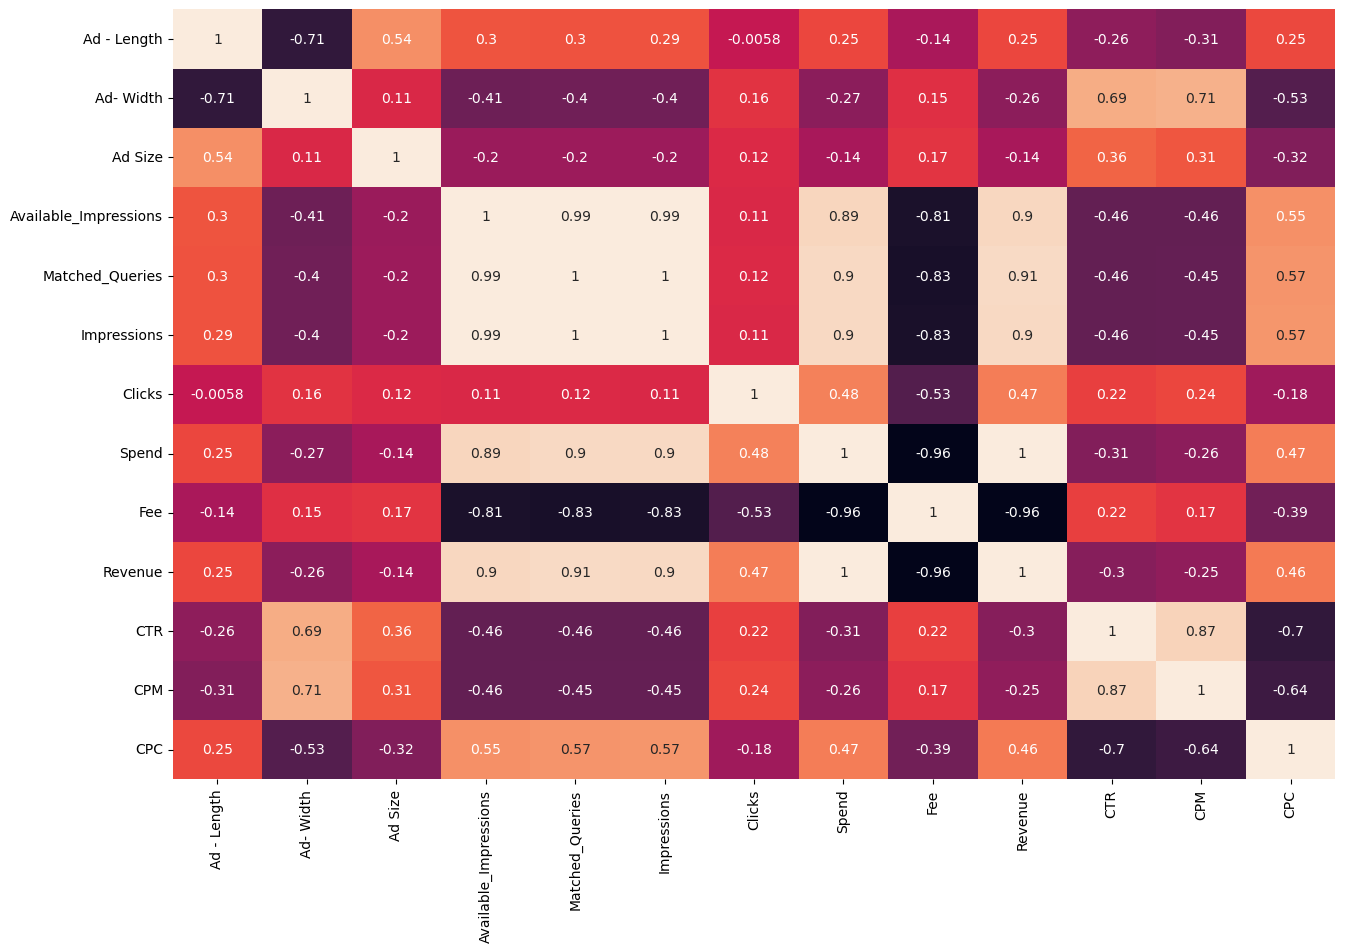

In [71]:
# check corelation among variables
plt.figure(figsize  = (15,10))
sns.heatmap(df_new.corr(), annot = True, cbar=False)
plt.show()

**Observations:**

- There is a strong positive correlation between CTR and CPM. 
- The exposure of the advertisement is positively correlated with CTR. This indicates that ad is generating lot of clicks. 
- There is a strong negative correlation between Fee & spend and Fee & Revenue.

### Problem 1 - Data Preprocessing
#### - Missing value check and treatment - Outlier Treatment - z-score scaling Note: Treat missing values in CPC, CTR and CPM using the formula given.

In [72]:
# checking for null values
df_new.isnull().sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [178]:
# Treating null values of CTR
df_new['CTR']=df_new['CTR'].fillna((df_new['Clicks']/df_new['Impressions']*100))

In [179]:
# Treating null values of CPM
df_new['CPM']=df_new['CPM'].fillna((df_new['Spend']/df_new['Impressions'])*1000)

In [180]:
# Treating null values of CPC
df_new['CPC']=df_new['CPC'].fillna(df_new['Spend']/df_new['Clicks'])

In [7]:
# checking for null values after treatment
df_new.isnull().sum()

Ad - Length              0
Ad- Width                0
Ad Size                  0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [77]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


In [78]:
df_new.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    23066.0  2.614863e+00  7.853405e+00      0.0001   
CPM                    23066.0  8.396730e+00  9.057082e+00      0.0000   
CPC                    23066.0  3.366523e-01  3.412311e-01      0.0000   

                                25%            50%           75%          max  
Ad - Length              120.000000     300.000000  7.200000e+02       728.00  
Ad- Width                250.000000     300.000000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.000000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.000000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.000000  1.279375e+04    143049.00  
Spend                     85.180000    1425.125000  3.121400e+03     26931.87  
Fee                        0.330000       0.350000  3.500000e-01         0.35  
Revenue                   55.365375     926.335000  2.091338e+03     21276.18  
CTR                        0.003400       0.112650  1.837777e-01       200.00  
CPM                        1.750000       8.370742  1.304000e+01       715.00  
CPC                        0.090000       0.140000  5.500000e-01         7.26

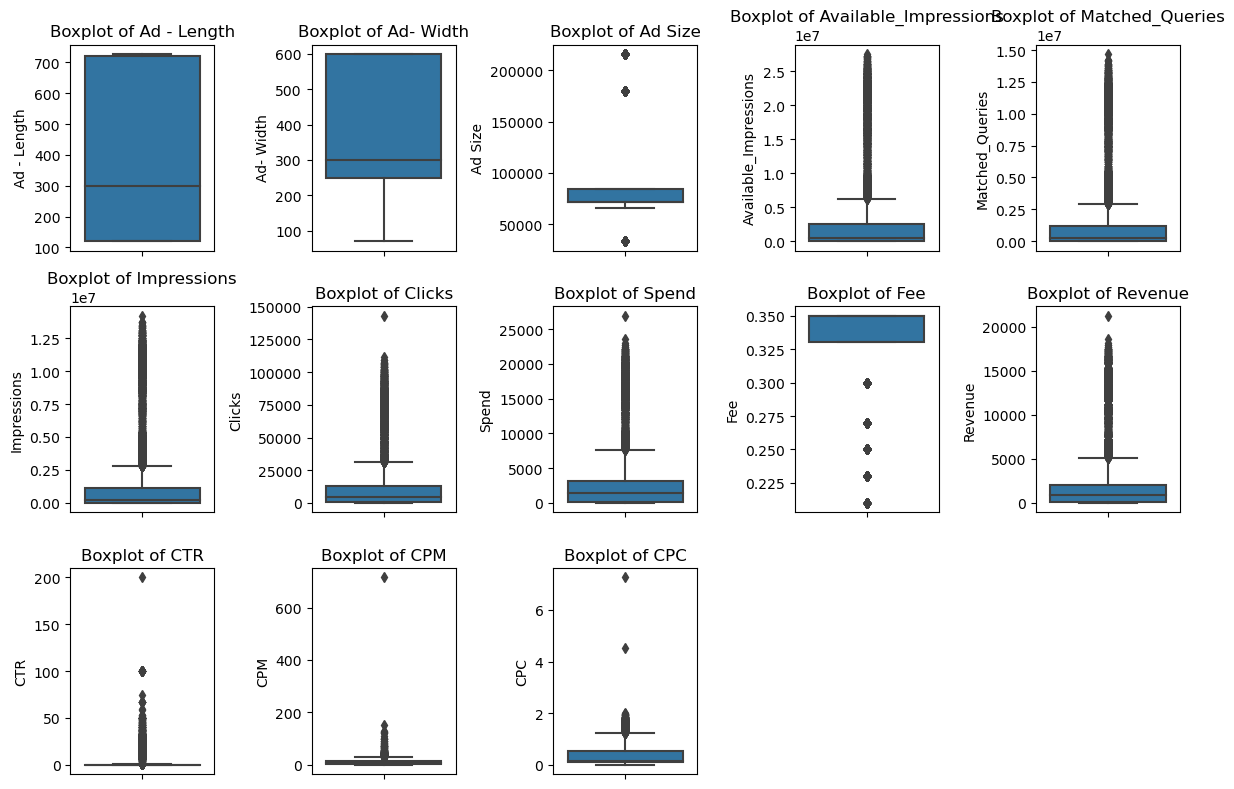

In [181]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [182]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [183]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_new[i])
    df_new[i] = np.where(df_new[i] > UL, UL, df_new[i])
    df_new[i] = np.where(df_new[i] < LL, LL, df_new[i])

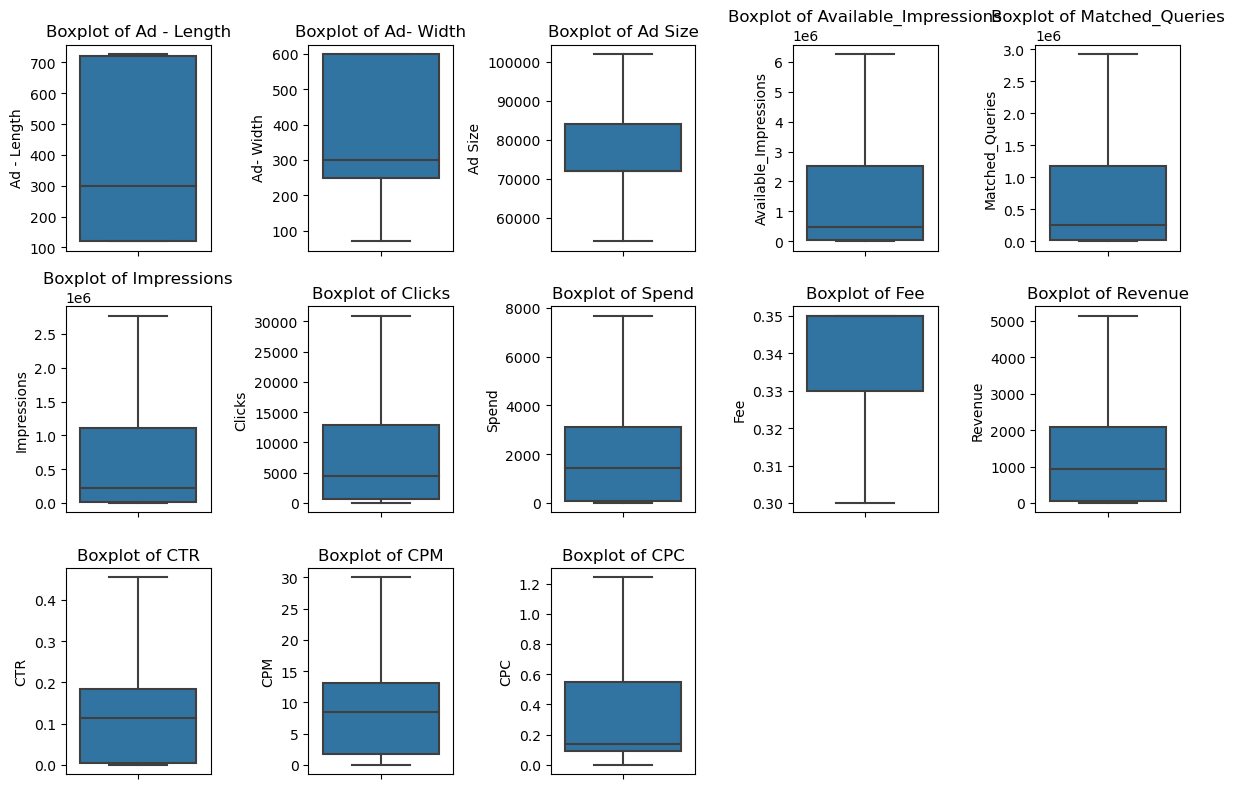

In [184]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [100]:
df_new.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  7.601188e+04  5.252055e+03  72000.000000   
Available_Impressions  23066.0  1.012021e+06  1.046469e+06  33672.250000   
Matched_Queries        23066.0  4.961223e+05  4.846397e+05  18282.500000   
Impressions            23066.0  4.588169e+05  4.607521e+05   7990.500000   
Clicks                 23066.0  5.836562e+03  4.910674e+03    710.000000   
Spend                  23066.0  3.121400e+03  5.752679e-10   3121.400000   
Fee                    23066.0  3.448626e-01  8.738349e-03      0.330000   
Revenue                23066.0  9.842672e+02  8.110098e+02     55.365375   
CTR                    23066.0  9.356938e-02  7.508412e-02      0.003400   
CPM                    23066.0  7.178427e+00  4.981789e+00      1.750000   
CPC                    23066.0  2.711942e-01  1.988347e-01      0.090000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  8.400000e+04  
Available_Impressions  33672.437500  483771.000000  2.527583e+06  2.527712e+06  
Matched_Queries        18285.875000  258087.500000  1.180566e+06  1.180700e+06  
Impressions             7990.875000  225290.000000  1.112413e+06  1.112428e+06  
Clicks                   710.000000    4425.000000  1.279281e+04  1.279375e+04  
Spend                   3121.400000    3121.400000  3.121400e+03  3.121400e+03  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.369031     926.335000  2.091067e+03  2.091338e+03  
CTR                        0.003400       0.112650  1.837610e-01  1.837777e-01  
CPM                        1.750000       8.370742  1.304000e+01  1.304000e+01  
CPC                        0.090000       0.140000  5.500000e-01  5.500000e-01

In [185]:
#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

In [186]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)
df_scaled.head().T

0         1         2         3         4
Ad - Length           -0.364496 -0.364496 -0.364496 -0.364496 -0.364496
Ad- Width             -0.432797 -0.432797 -0.432797 -0.432797 -0.432797
Ad Size               -0.102518 -0.102518 -0.102518 -0.102518 -0.102518
Available_Impressions -0.755333 -0.755345 -0.754900 -0.755040 -0.755610
Matched_Queries       -0.778949 -0.778988 -0.778919 -0.778781 -0.779030
Impressions           -0.768478 -0.768516 -0.768445 -0.768302 -0.768560
Clicks                -0.867488 -0.867488 -0.867488 -0.867488 -0.867488
Spend                 -0.893170 -0.893170 -0.893170 -0.893170 -0.893170
Fee                    0.535724  0.535724  0.535724  0.535724  0.535724
Revenue               -0.880093 -0.880093 -0.880093 -0.880093 -0.880093
CTR                   -0.891201 -0.888615 -0.893142 -0.898315 -0.884734
CPM                   -1.194562 -1.194562 -1.194562 -1.194562 -1.194562
CPC                   -1.041140 -1.041140 -1.041140 -1.041140 -1.041140

In [103]:
df_scaled.describe().T

count          mean       std           min  \
Ad - Length            23066.0  1.281478e-16  1.000022 -1.134891e+00   
Ad- Width              23066.0 -1.182903e-16  1.000022 -1.319110e+00   
Ad Size                23066.0  5.520214e-16  1.000022 -7.638850e-01   
Available_Impressions  23066.0 -7.886020e-17  1.000022 -9.349252e-01   
Matched_Queries        23066.0 -6.900268e-17  1.000022 -9.859905e-01   
Impressions            23066.0 -1.084328e-16  1.000022 -9.784789e-01   
Clicks                 23066.0  8.871773e-17  1.000022 -1.043986e+00   
Spend                  23066.0 -9.094947e-13  0.000000 -9.094947e-13   
Fee                    23066.0  3.233268e-15  1.000022 -1.700881e+00   
Revenue                23066.0  9.857525e-18  1.000022 -1.145389e+00   
CTR                    23066.0 -7.886020e-17  1.000022 -1.200938e+00   
CPM                    23066.0 -7.886020e-17  1.000022 -1.089678e+00   
CPC                    23066.0  1.626492e-16  1.000022 -9.113004e-01   

                                25%           50%           75%           max  
Ad - Length           -1.134891e+00 -3.644957e-01  1.433093e+00  1.467332e+00  
Ad- Width             -4.327968e-01 -1.865987e-01  1.290590e+00  1.290590e+00  
Ad Size               -7.638850e-01 -7.638850e-01  1.520985e+00  1.520985e+00  
Available_Impressions -9.349250e-01 -5.048040e-01  1.448293e+00  1.448417e+00  
Matched_Queries       -9.859835e-01 -4.911689e-01  1.412305e+00  1.412580e+00  
Impressions           -9.784781e-01 -5.068495e-01  1.418573e+00  1.418606e+00  
Clicks                -1.043986e+00 -2.874539e-01  1.416588e+00  1.416779e+00  
Spend                 -9.094947e-13 -9.094947e-13 -9.094947e-13 -9.094947e-13  
Fee                   -1.700881e+00  5.879306e-01  5.879306e-01  5.879306e-01  
Revenue               -1.145385e+00 -7.143378e-02  1.364747e+00  1.365082e+00  
CTR                   -1.200938e+00  2.541288e-01  1.201234e+00  1.201457e+00  
CPM                   -1.089678e+00  2.393400e-01  1.176626e+00  1.176626e+00  
CPC                   -9.113004e-01 -6.598297e-01  1.402229e+00  1.402229e+00

In [190]:
#Creating copy of the data to store labels from each algorithm
df_scaled_copy = df_scaled.copy(deep=True)

### Problem 1 - Hierarchical Clustering
#### - Construct a dendrogram using Ward linkage and Euclidean distance - Identify the optimum number of Clusters

In [232]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

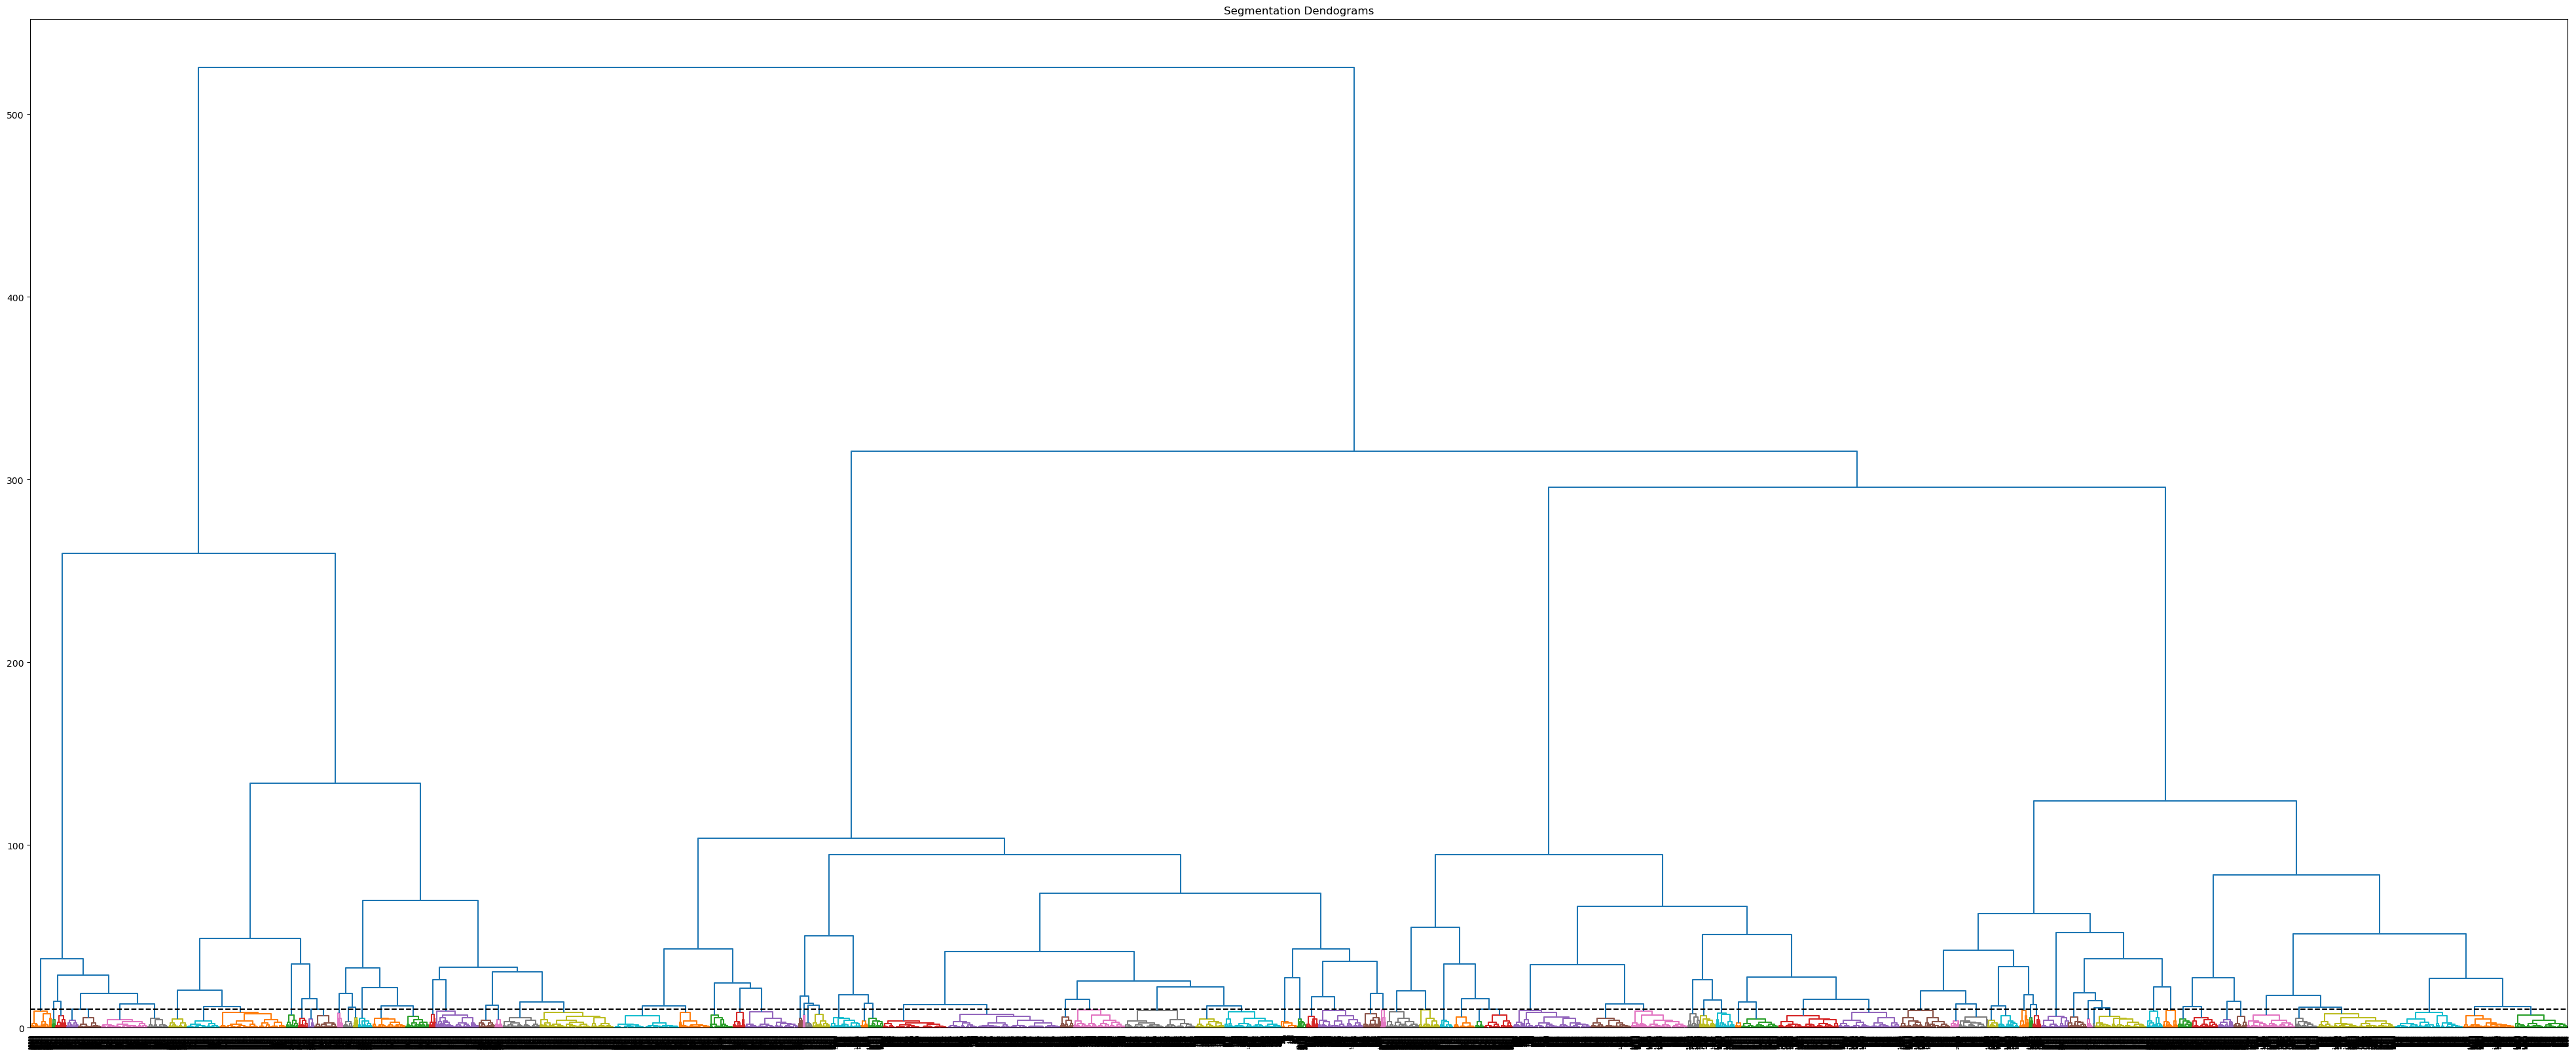

In [233]:
plt.figure(figsize=(50, 20))
plt.title("Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'),color_threshold=10)
plt.axhline(10, color='black', linestyle='--')
plt.show() 

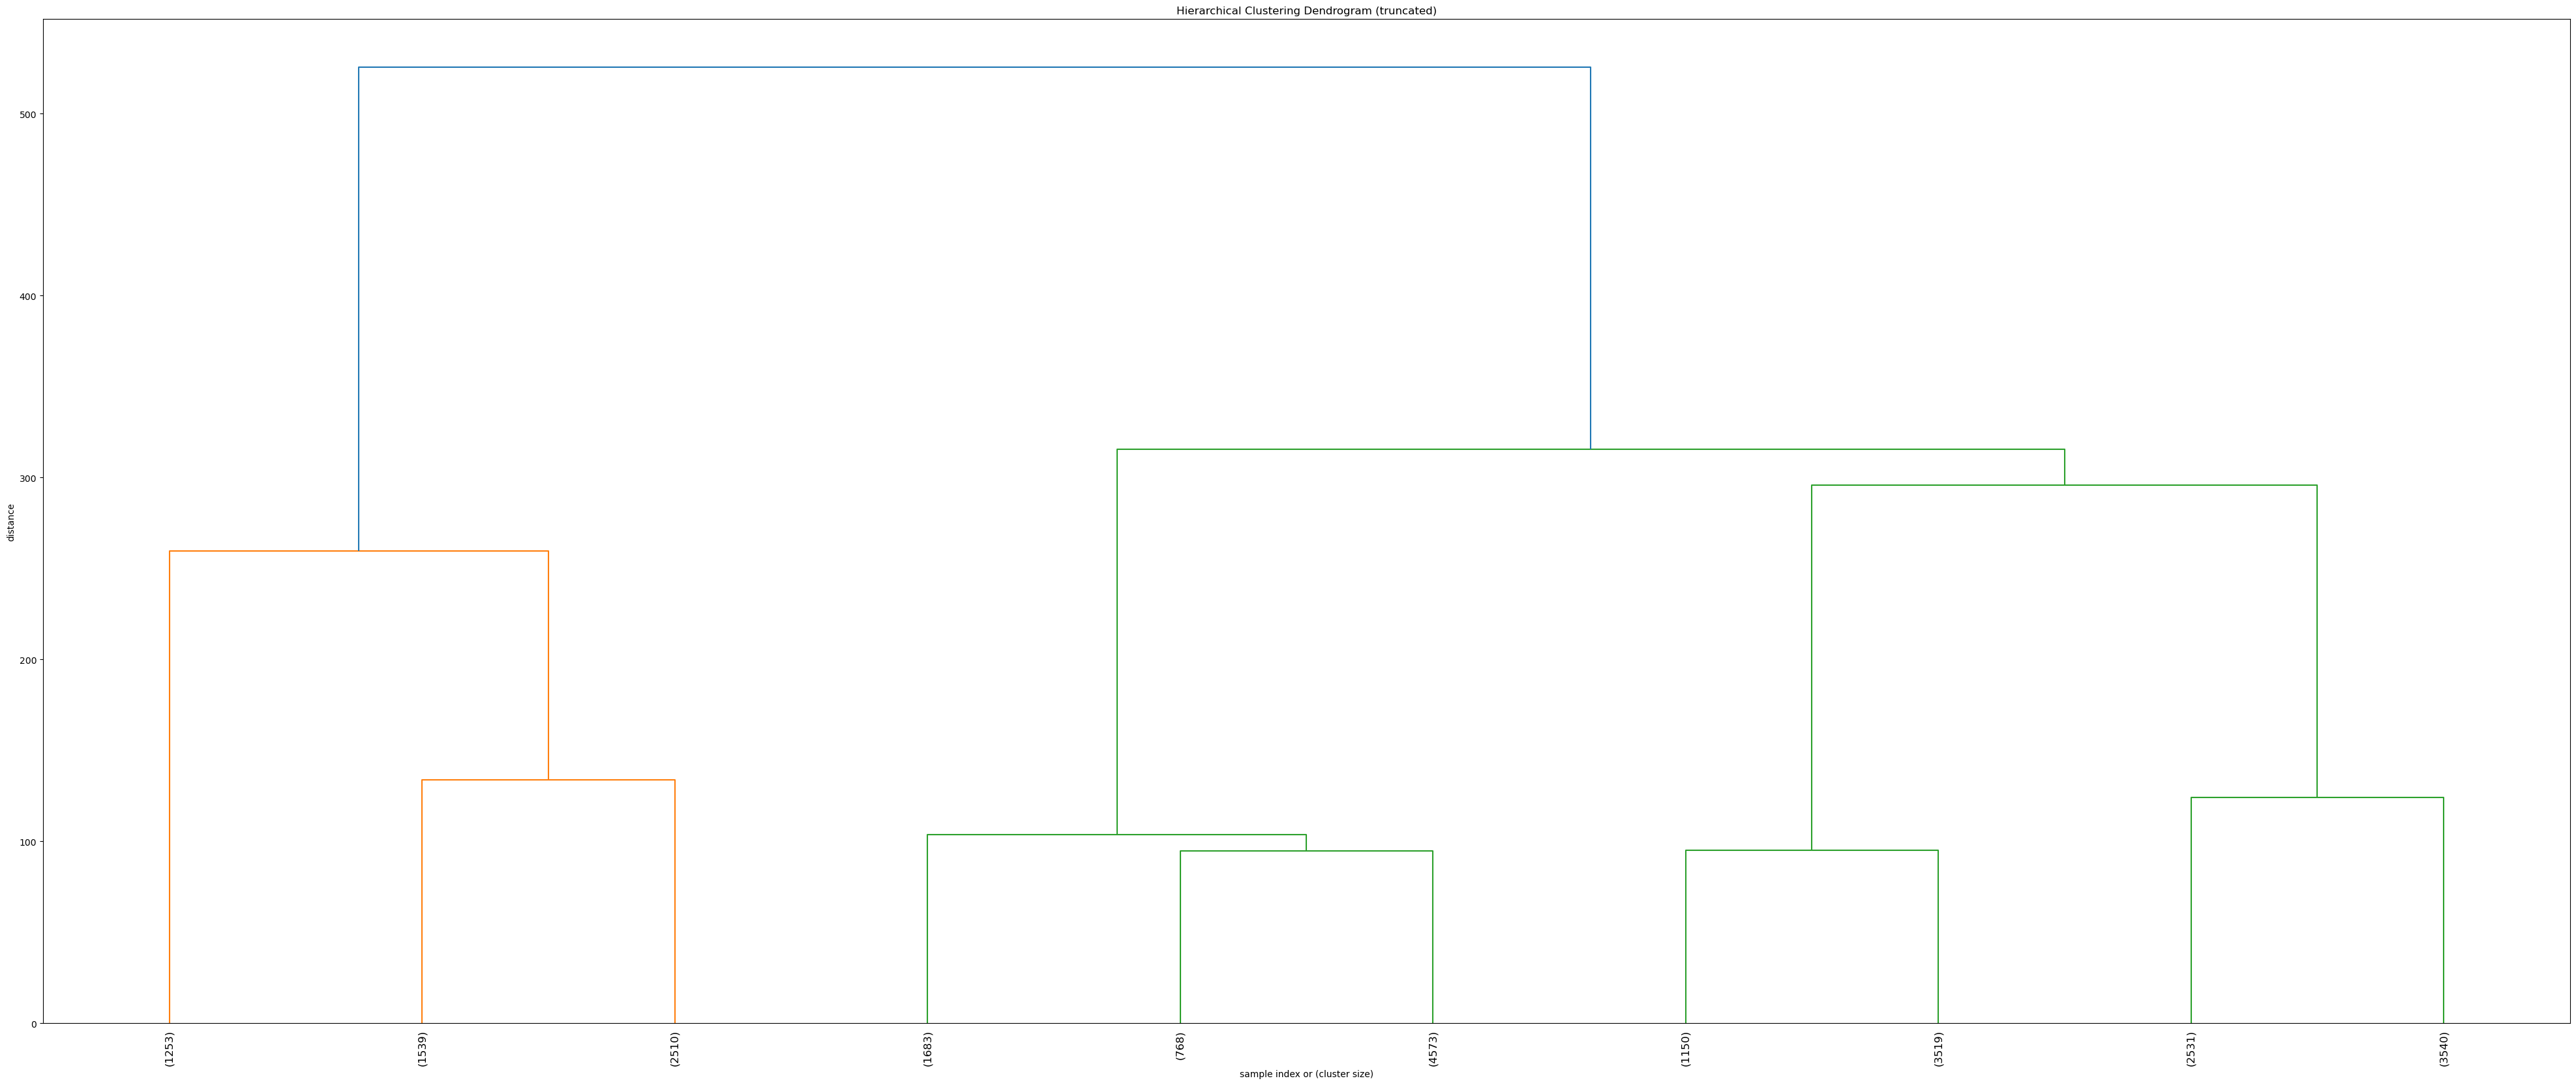

In [234]:
plt.figure(figsize=(50, 20))
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
)
plt.show()

<span style="font-family:Calibri Light ; font-weight:bold;font-size:0.5.5em;"> 

**With the optimum clusters, let us apply  agglomerative clustering and predict clusters for the given dataset**

In [106]:
clusters_1 = shc.fcluster(shc.linkage(df_scaled, method='ward'), 5, criterion='maxclust')# Here 5 is number of clusters
clusters_1

array([3, 3, 3, ..., 3, 5, 3], dtype=int32)

In [107]:
clusters_2 = shc.fcluster(shc.linkage(df_scaled, method='ward'),10 , criterion='distance')# here 10 is the value of color_threshold in the dendrogram
clusters_2

array([44, 44, 44, ..., 42, 73, 42], dtype=int32)

In [108]:
df_new['cluster_1']= clusters_1
df_new['cluster_2']= clusters_2
df_new.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0               33672.25          18282.5   
1          300        250  75000.0               33672.25          18282.5   
2          300        250  75000.0               33672.25          18282.5   
3          300        250  75000.0               33672.25          18282.5   
4          300        250  75000.0               33672.25          18282.5   

   Impressions  Clicks   Spend   Fee    Revenue     CTR   CPM   CPC  \
0       7990.5   710.0  3121.4  0.35  55.365375  0.0034  1.75  0.09   
1       7990.5   710.0  3121.4  0.35  55.365375  0.0035  1.75  0.09   
2       7990.5   710.0  3121.4  0.35  55.365375  0.0034  1.75  0.09   
3       7990.5   710.0  3121.4  0.35  55.365375  0.0034  1.75  0.09   
4       7990.5   710.0  3121.4  0.35  55.365375  0.0041  1.75  0.09   

   cluster_1  cluster_2  
0          3         44  
1          3         44  
2          3         44  
3          3         44  
4          3         44

In [109]:
df1 = df_new.drop(['cluster_2'],axis=1)
df_clust_1 = df1.groupby('cluster_1').mean()
cluster_1_freq = df_new['cluster_1'].value_counts().sort_index()
df_clust_1['cluster count'] = cluster_1_freq
df_clust_1

Ad - Length   Ad- Width       Ad Size  Available_Impressions  \
cluster_1                                                                 
1           457.939224  201.858345  74960.028050           2.526525e+06   
2           429.908998  145.973315  74120.424222           1.673069e+06   
3           614.605536  307.923875  83674.567474           2.349951e+05   
4           120.000000  600.000000  72000.000000           8.045012e+05   
5           120.000000  600.000000  72000.000000           4.938835e+04   

           Matched_Queries   Impressions        Clicks   Spend       Fee  \
cluster_1                                                                  
1             1.180612e+06  1.112347e+06   8918.884876  3121.4  0.330000   
2             8.004331e+05  7.575678e+05   3375.995039  3121.4  0.350000   
3             1.321140e+05  1.099928e+05   8203.039273  3121.4  0.349076   
4             5.656349e+05  4.770093e+05  12793.750000  3121.4  0.330000   
5             2.929323e+04  1.758490e+04   2017.665643  3121.4  0.350000   

               Revenue       CTR        CPM       CPC  cluster count  
cluster_1                                                             
1          2090.233851  0.030130   1.818729  0.537641           4278  
2           967.884476  0.032048   1.978143  0.440075           5846  
3           734.936823  0.135667  10.634387  0.100001           5780  
4          2091.058835  0.145546  12.555301  0.114376           1380  
5           167.630414  0.148221  11.663745  0.111867           5782

In [110]:
df2 = df_new.drop(['cluster_1'],axis=1)
df_clust_2 = df2.groupby('cluster_2').mean()
cluster_2_freq = df_new['cluster_2'].value_counts().sort_index()
df_clust_2['cluster count'] = cluster_2_freq
df_clust_2

Ad - Length   Ad- Width       Ad Size  Available_Impressions  \
cluster_2                                                                 
1           300.000000  250.000000  75000.000000           2.526477e+06   
2           304.137931  245.862069  74931.034483           2.520067e+06   
3           300.000000  250.000000  75000.000000           2.527712e+06   
4           300.000000  600.000000  84000.000000           2.519397e+06   
5           336.000000  250.000000  84000.000000           2.527712e+06   
...                ...         ...           ...                    ...   
73          120.000000  600.000000  72000.000000           3.378732e+04   
74          120.000000  600.000000  72000.000000           4.897384e+04   
75          120.000000  600.000000  72000.000000           4.385548e+04   
76          120.000000  600.000000  72000.000000           4.065434e+04   
77          120.000000  600.000000  72000.000000           3.464195e+04   

           Matched_Queries   Impressions        Clicks   Spend   Fee  \
cluster_2                                                              
1             1.180700e+06  1.112428e+06   5468.142446  3121.4  0.33   
2             1.180383e+06  1.112111e+06  10570.082375  3121.4  0.33   
3             1.180700e+06  1.112428e+06   8322.334081  3121.4  0.33   
4             1.178262e+06  1.110244e+06   8628.801653  3121.4  0.33   
5             1.180700e+06  1.112428e+06  12413.025735  3121.4  0.33   
...                    ...           ...           ...     ...   ...   
73            1.847971e+04  8.413768e+03    885.049828  3121.4  0.35   
74            2.194614e+04  8.582011e+03    789.705446  3121.4  0.35   
75            2.136402e+04  8.700737e+03    823.727171  3121.4  0.35   
76            2.024285e+04  8.659878e+03    744.604730  3121.4  0.35   
77            1.856575e+04  8.029459e+03    738.287818  3121.4  0.35   

               Revenue       CTR        CPM       CPC  cluster count  
cluster_2                                                             
1          2087.191990  0.003400   1.845986  0.549468            695  
2          2090.520202  0.003469   1.772682  0.445939            261  
3          2091.315798  0.003400   1.756895  0.539159            892  
4          2090.283898  0.003428   1.813388  0.536612            121  
5          2090.902428  0.003444   1.797794  0.520294            136  
...                ...       ...        ...       ...            ...  
73           62.432992  0.182374  13.019986  0.101462           1746  
74           56.382640  0.089777   7.581386  0.100470            404  
75           59.456479  0.102611  10.267918  0.107461            898  
76           70.006556  0.082426  12.948209  0.203514            296  
77           56.861482  0.125748  12.915141  0.127711            747  

[77 rows x 14 columns]

In [111]:
df_new.to_excel(r'C:\Users\admin\Desktop\Aaryani\Great Learning\4th Month\Project\Hclustering.xlsx')

### Problem 1 - K-means Clustering
#### - Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling 

In [187]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

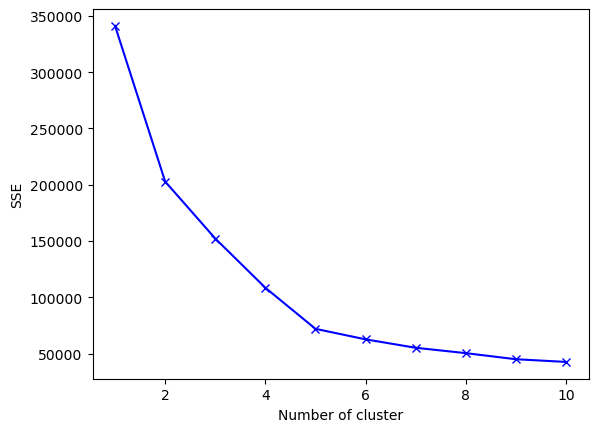

In [230]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    sse[k] = kmeans.inertia_ 

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**Observations:**

- We can see from the plot that there is a consistent dip from 2 to 10 and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 10 as our no. of clusters. 
- So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

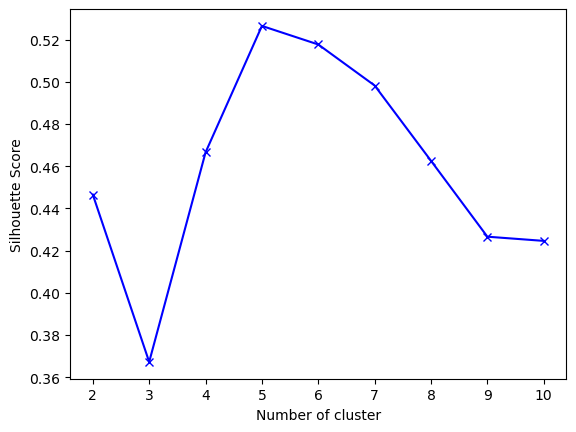

In [231]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    sc[k] = silhouette_score(df_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

**Observations:**

- We can see from the plot that silhouette score is highest for k=5. Well that makes it slightly easy for us and we can start with first understanding these 5 clusters. So let's take the number of clusters as 5.

#### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [199]:
kmeans.inertia_

72133.68138322423

In [200]:
kmeans = KMeans(n_clusters = 1,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

341016.3638688979

In [201]:
kmeans = KMeans(n_clusters =2,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

202868.30534062648

In [202]:
kmeans = KMeans(n_clusters = 3,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

152290.15696627283

In [203]:
kmeans = KMeans(n_clusters = 4,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

108607.76966523394

In [204]:
kmeans = KMeans(n_clusters = 5,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

72133.68138322423

In [205]:
kmeans = KMeans(n_clusters = 6,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

62808.66655529762

In [206]:
kmeans = KMeans(n_clusters = 7,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

55323.93255737438

In [207]:
kmeans = KMeans(n_clusters = 8,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

50558.26465374516

In [208]:
kmeans = KMeans(n_clusters = 9,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

45162.84708359753

In [209]:
kmeans = KMeans(n_clusters = 10,random_state=1)
kmeans.fit(df_scaled)
kmeans.inertia_

42771.12364776624

### Cluster evaluation for 2,3,4,5,6,7,8,9,10 clusters: the silhouette score

In [210]:
kmeans=KMeans(n_clusters=2, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.44651988373254536

In [211]:
kmeans=KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.3672637821187046

In [212]:
kmeans=KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.4665228226094241

In [213]:
kmeans=KMeans(n_clusters=5, random_state=1)
kmeans.fit(df_scaled)
labels1=kmeans.labels_
silhouette_score(df_scaled,labels1,random_state=1)

0.5264467856836863

In [214]:
kmeans=KMeans(n_clusters=6, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.5176518759018871

In [215]:
kmeans=KMeans(n_clusters=7, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.49821196258439543

In [216]:
kmeans=KMeans(n_clusters=8, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.46254283574953625

In [217]:
kmeans=KMeans(n_clusters=9, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.4265936772073432

In [218]:
kmeans=KMeans(n_clusters=10, random_state=1)
kmeans.fit(df_scaled)
labels=kmeans.labels_
silhouette_score(df_scaled,labels,random_state=1)

0.4246063988418098

In [219]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(df_scaled)

#Adding predicted labels to the original data and scaled data 
df_scaled_copy['KMeans_Labels'] = kmeans.predict(df_scaled)
df['KMeans_Labels'] = kmeans.predict(df_scaled)

In [220]:
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  KMeans_Labels  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0              0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0              0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0              0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0              0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0              0

In [221]:
df_new1 = df.drop(columns=["Timestamp", "InventoryType", "Ad Type", "Platform", "Device Type", "Format"])
df_new1.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  KMeans_Labels  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0              0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0              0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0              0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0              0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0              0

In [224]:
silhouette_score(df_scaled,labels1)
df_new1["KMeans_Labels"] = labels1
df_new1.KMeans_Labels.value_counts().sort_index()

KMeans_Labels
0    6140
1    4698
2    6640
3    4049
4    1539
Name: count, dtype: int64

In [226]:
clust_profile=df_new1.groupby("KMeans_Labels").mean()
clust_profile['freq']=df_new1.KMeans_Labels.value_counts().sort_index()
clust_profile

Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
KMeans_Labels                                                                  
0               424.471010  146.286645   53525.081433           1.838272e+06   
1               682.020434  305.246914  206058.748404           2.626464e+05   
2               146.024096  568.373494   77139.759036           3.648993e+04   
3               465.880958  199.212151   75205.058039           1.039627e+07   
4               141.543860  572.482131   75680.311891           8.055940e+05   

               Matched_Queries   Impressions        Clicks        Spend  \
KMeans_Labels                                                             
0                 8.784161e+05  8.398711e+05   3304.398860  1524.047645   
1                 1.416907e+05  1.207011e+05  14363.409110  1254.130773   
2                 2.181334e+04  1.566770e+04   1888.464759   210.052837   
3                 5.630305e+06  5.451651e+06  11253.998024  8653.044280   
4                 5.663903e+05  4.777502e+05  65260.276803  6985.407472   

                    Fee      Revenue       CTR        CPM       CPC  \
KMeans_Labels                                                         
0              0.349235   993.095081  0.004052   1.788734  0.545047   
1              0.349544   816.719858  0.124560  11.185018  0.092146   
2              0.349991   136.562174  0.144317  13.708249  0.109895   
3              0.290385  6378.676694  0.002173   1.567269  0.756618   
4              0.288356  5013.785448  0.137939  15.184727  0.110077   

               KMeans_Lables  freq  
KMeans_Labels                       
0                        0.0  6140  
1                        1.0  4698  
2                        2.0  6640  
3                        3.0  4049  
4                        4.0  1539

In [227]:
#Calculating mean and median of the original data for each label
mean = df_new1.groupby('KMeans_Labels').mean()
median = df_new1.groupby('KMeans_Labels').median()

In [228]:
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean','group_2 Mean','group_3 Mean','group_4 Mean', 'group_0 Median', 'group_1 Median','group_2 Median','group_3 Median','group_4 Median',]
df_kmeans.T

group_0 Mean   group_1 Mean  group_2 Mean  \
Ad - Length            4.244710e+02     682.020434    146.024096   
Ad- Width              1.462866e+02     305.246914    568.373494   
Ad Size                5.352508e+04  206058.748404  77139.759036   
Available_Impressions  1.838272e+06  262646.369519  36489.929217   
Matched_Queries        8.784161e+05  141690.728608  21813.339006   
Impressions            8.398711e+05  120701.134951  15667.703916   
Clicks                 3.304399e+03   14363.409110   1888.464759   
Spend                  1.524048e+03    1254.130773    210.052837   
Fee                    3.492345e-01       0.349544      0.349991   
Revenue                9.930951e+02     816.719858    136.562174   
CTR                    4.051650e-03       0.124560      0.144317   
CPM                    1.788734e+00      11.185018     13.708249   
CPC                    5.450473e-01       0.092146      0.109895   
KMeans_Lables          0.000000e+00       1.000000      2.000000   

                       group_3 Mean   group_4 Mean  group_0 Median  \
Ad - Length            4.658810e+02     141.543860    4.800000e+02   
Ad- Width              1.992122e+02     572.482131    7.000000e+01   
Ad Size                7.520506e+04   75680.311891    3.360000e+04   
Available_Impressions  1.039627e+07  805593.964263    1.863021e+06   
Matched_Queries        5.630305e+06  566390.274854    8.722895e+05   
Impressions            5.451651e+06  477750.160494    8.263720e+05   
Clicks                 1.125400e+04   65260.276803    3.320000e+03   
Spend                  8.653044e+03    6985.407472    1.561280e+03   
Fee                    2.903853e-01       0.288356    3.500000e-01   
Revenue                6.378677e+03    5013.785448    1.014834e+03   
CTR                    2.173004e-03       0.137939    4.000000e-03   
CPM                    1.567269e+00      15.184727    1.810000e+00   
CPC                    7.566183e-01       0.110077    4.600000e-01   
KMeans_Lables          3.000000e+00       4.000000    0.000000e+00   

                       group_1 Median  group_2 Median  group_3 Median  \
Ad - Length                  720.0000        120.0000    3.000000e+02   
Ad- Width                    300.0000        600.0000    2.500000e+02   
Ad Size                   216000.0000      72000.0000    7.500000e+04   
Available_Impressions     214679.5000      13633.5000    7.055688e+06   
Matched_Queries           138272.0000       8150.0000    3.878848e+06   
Impressions               116475.5000       3578.0000    3.797137e+06   
Clicks                     14625.5000        449.5000    8.931000e+03   
Spend                       1340.8300         46.7500    5.231320e+03   
Fee                            0.3500          0.3500    3.000000e-01   
Revenue                      871.5390         30.3840    3.661920e+03   
CTR                            0.1232          0.1282    2.200000e-03   
CPM                           10.9000         12.9400    1.560000e+00   
CPC                            0.0900          0.1000    7.100000e-01   
KMeans_Lables                  1.0000          2.0000    3.000000e+00   

                       group_4 Median  
Ad - Length                  120.0000  
Ad- Width                    600.0000  
Ad Size                    72000.0000  
Available_Impressions     828944.0000  
Matched_Queries           582970.0000  
Impressions               490231.0000  
Clicks                     68243.0000  
Spend                       7172.1100  
Fee                            0.2700  
Revenue                     5235.6400  
CTR                            0.1363  
CPM                           14.6700  
CPC                            0.1100  
KMeans_Lables                  4.0000

In [229]:
df.to_excel(r'C:\Users\admin\Desktop\Aaryani\Great Learning\4th Month\Project\Kclustering.xlsx')

### Problem 2 - Define the problem and perform Exploratory Data Analysis
#### - Problem Definition - Check shape, Data types, statistical summary - Perform an EDA on the data to extract useful insights Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?

In [62]:
df=pd.read_excel(r"C:\Users\admin\Desktop\Aaryani\Great Learning\4th Month\Project\PCA+India+Data_Census.xlsx")
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [3]:
df.shape

(640, 61)

In [4]:
print("There are 640 rows & 61 columns in the dataset")

There are 640 rows & 61 columns in the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

**Observation:**

- There are 640 observations and 61 columns in the data.
- All variables except state and area name are of numeric data type.

### Exploratory Data Analysis

In [7]:
# Checking for duplicate data

dups = df.duplicated()
df[dups].sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: object

In [64]:
df.describe().T.round(2)

count       mean        std    min       25%      50%  \
State Code      640.0      17.11       9.43    1.0      9.00     18.0   
Dist.Code       640.0     320.50     184.90    1.0    160.75    320.5   
No_HH           640.0   51222.87   48135.41  350.0  19484.00  35837.0   
TOT_M           640.0   79940.58   73384.51  391.0  30228.00  58339.0   
TOT_F           640.0  122372.08  113600.72  698.0  46517.75  87724.5   
M_06            640.0   12309.10   11500.91   56.0   4733.75   9159.0   
F_06            640.0   11942.30   11326.29   56.0   4672.25   8663.0   
M_SC            640.0   13820.95   14426.37    0.0   3466.25   9591.5   
F_SC            640.0   20778.39   21727.89    0.0   5603.25  13709.0   
M_ST            640.0    6191.81    9912.67    0.0    293.75   2333.5   
F_ST            640.0   10155.64   15875.70    0.0    429.50   3834.5   
M_LIT           640.0   57967.98   55910.28  286.0  21298.00  42693.5   
F_LIT           640.0   66359.57   75037.86  371.0  20932.00  43796.5   
M_ILL           640.0   21972.60   19825.61  105.0   8590.00  15767.5   
F_ILL           640.0   56012.52   47116.69  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.41   36419.54  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.76   37192.36  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.45   31480.92   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.85   29998.26  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.34    4739.16    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.04    5326.36    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.11    6399.51    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8926.00   12864.29    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.89    1278.64    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.77    3179.41    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.10   26068.48   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.04   18972.20  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.96    7410.79   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.91   10996.47  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.74    1311.55    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.68    3564.63    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.33    3781.56    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.28    6773.88    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.74     462.66    0.0     71.75    166.0   
MARG_HH_F       640.0     786.63    1198.72    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.15    3609.39    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.32    4115.19   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.17   39045.32  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.32   82970.41  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.99    6019.81   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.86    8467.47   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.85     905.64    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.58    2496.54    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.64    3059.59    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.85    5335.64    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.36     358.73    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.88     900.03    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.14    3036.96    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.55    3327.84   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.97    1489.71    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.05    2788.78   30.0    957.25   1928.0   
MARG_AL_0_3_M   640.0     250.89     453.34    0.0     47.00    114.5   
MARG_AL_0_3_F   640.0     558.10    1117.64    0.0    109.00    247.5   
MARG_HH_0_3_M   640.0     560.69     762.58    0.0    136.50    308.0   
M

In [87]:
df.State.value_counts()

State
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
La

In [91]:
df['Area Name'].value_counts()

Area Name
Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: count, Length: 635, dtype: int64

#### Observations:

- Data consists of 640 customer loan transactions with 61 features 

- There are no missing values in the data

- We have 2 categorical fields *'State' and 'Area Name'*.
- We have chosen 'TOT_M', 'TOT_F','M_LIT','F_LIT', and , 'TOT_WORK_M'. And comparing those 5 variable against 'State' and 'Dist.Code'.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Jammu & Kashmir'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Uttarakhand'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'NCT of Delhi'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Sikkim'),
  Text(11, 0, 'Arunachal Pradesh'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'West Bengal'),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'Madhya Pradesh'),
  Text(23, 0, 'Gujarat'),
  Text(24, 0, 'Daman & Diu'),
  Text(25, 0, 'Dadara & Nagar Havelli'),
  Text(26, 0, 'Maharashtra'),
  Text(27, 0, 'Andhra Pradesh'),
  Text(28, 0, 'Karnataka'

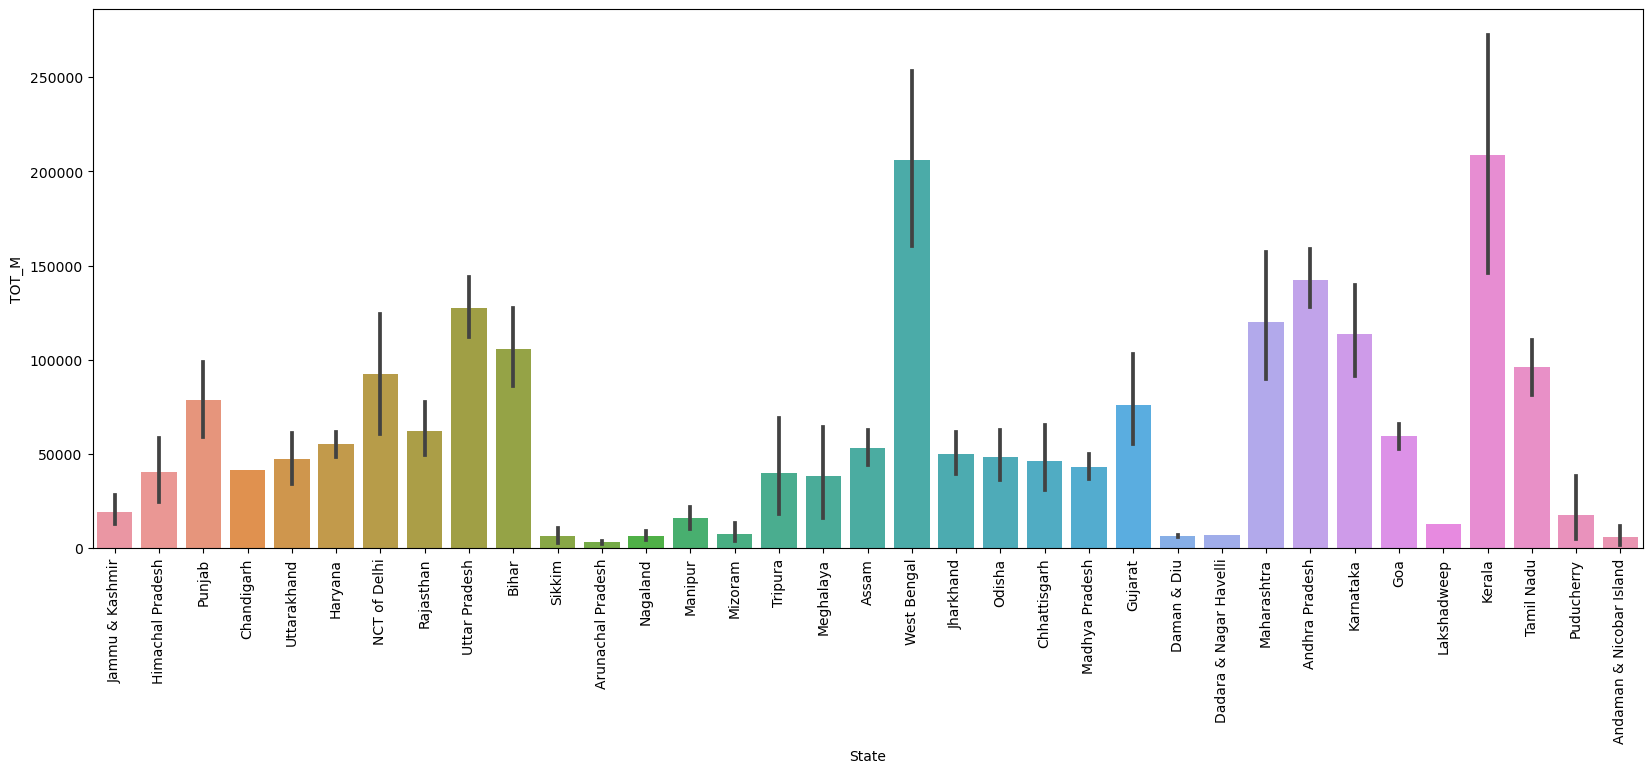

In [77]:
plt.figure(figsize=(20,7))
sns.barplot(data = df , x = 'State' , y = 'TOT_M');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Jammu & Kashmir'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Uttarakhand'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'NCT of Delhi'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Sikkim'),
  Text(11, 0, 'Arunachal Pradesh'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'West Bengal'),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'Madhya Pradesh'),
  Text(23, 0, 'Gujarat'),
  Text(24, 0, 'Daman & Diu'),
  Text(25, 0, 'Dadara & Nagar Havelli'),
  Text(26, 0, 'Maharashtra'),
  Text(27, 0, 'Andhra Pradesh'),
  Text(28, 0, 'Karnataka'

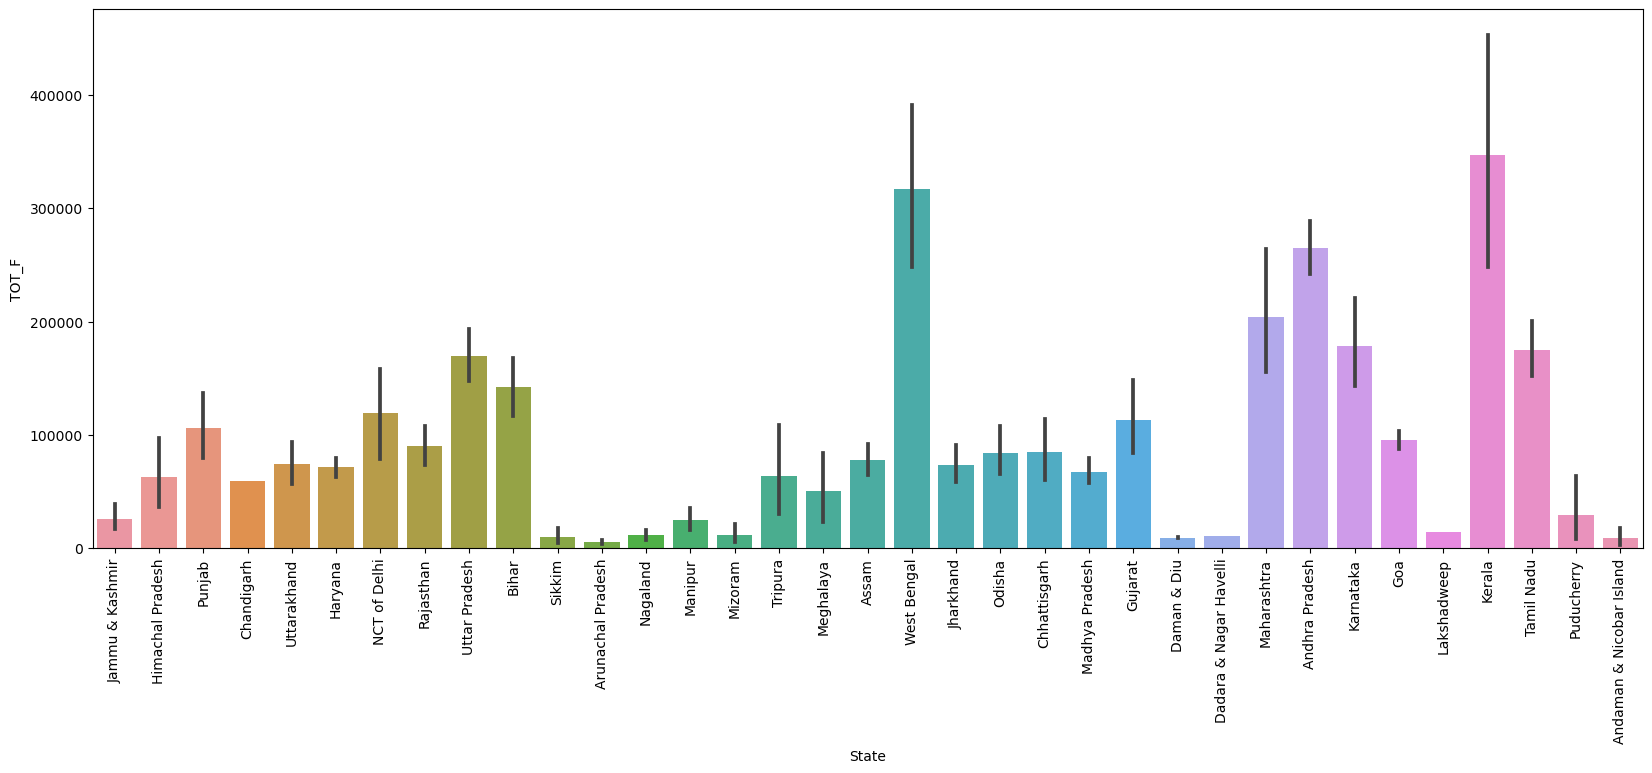

In [78]:
plt.figure(figsize=(20,7))
sns.barplot(data = df , x = 'State' , y = 'TOT_F');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Jammu & Kashmir'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Uttarakhand'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'NCT of Delhi'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Sikkim'),
  Text(11, 0, 'Arunachal Pradesh'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'West Bengal'),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'Madhya Pradesh'),
  Text(23, 0, 'Gujarat'),
  Text(24, 0, 'Daman & Diu'),
  Text(25, 0, 'Dadara & Nagar Havelli'),
  Text(26, 0, 'Maharashtra'),
  Text(27, 0, 'Andhra Pradesh'),
  Text(28, 0, 'Karnataka'

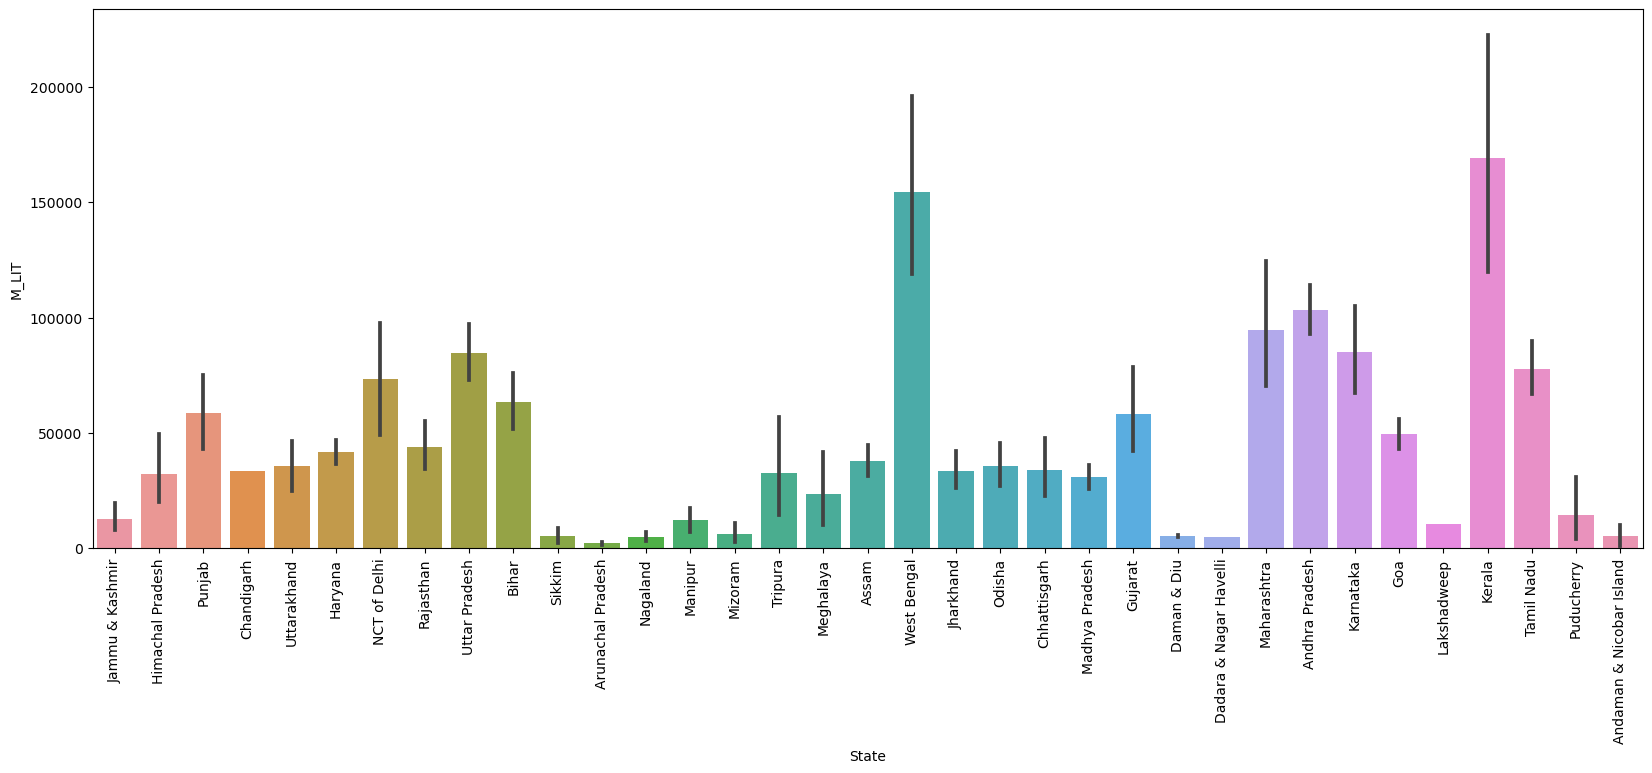

In [79]:
plt.figure(figsize=(20,7))
sns.barplot(data = df , x = 'State' , y = 'M_LIT');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Jammu & Kashmir'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Uttarakhand'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'NCT of Delhi'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Sikkim'),
  Text(11, 0, 'Arunachal Pradesh'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'West Bengal'),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'Madhya Pradesh'),
  Text(23, 0, 'Gujarat'),
  Text(24, 0, 'Daman & Diu'),
  Text(25, 0, 'Dadara & Nagar Havelli'),
  Text(26, 0, 'Maharashtra'),
  Text(27, 0, 'Andhra Pradesh'),
  Text(28, 0, 'Karnataka'

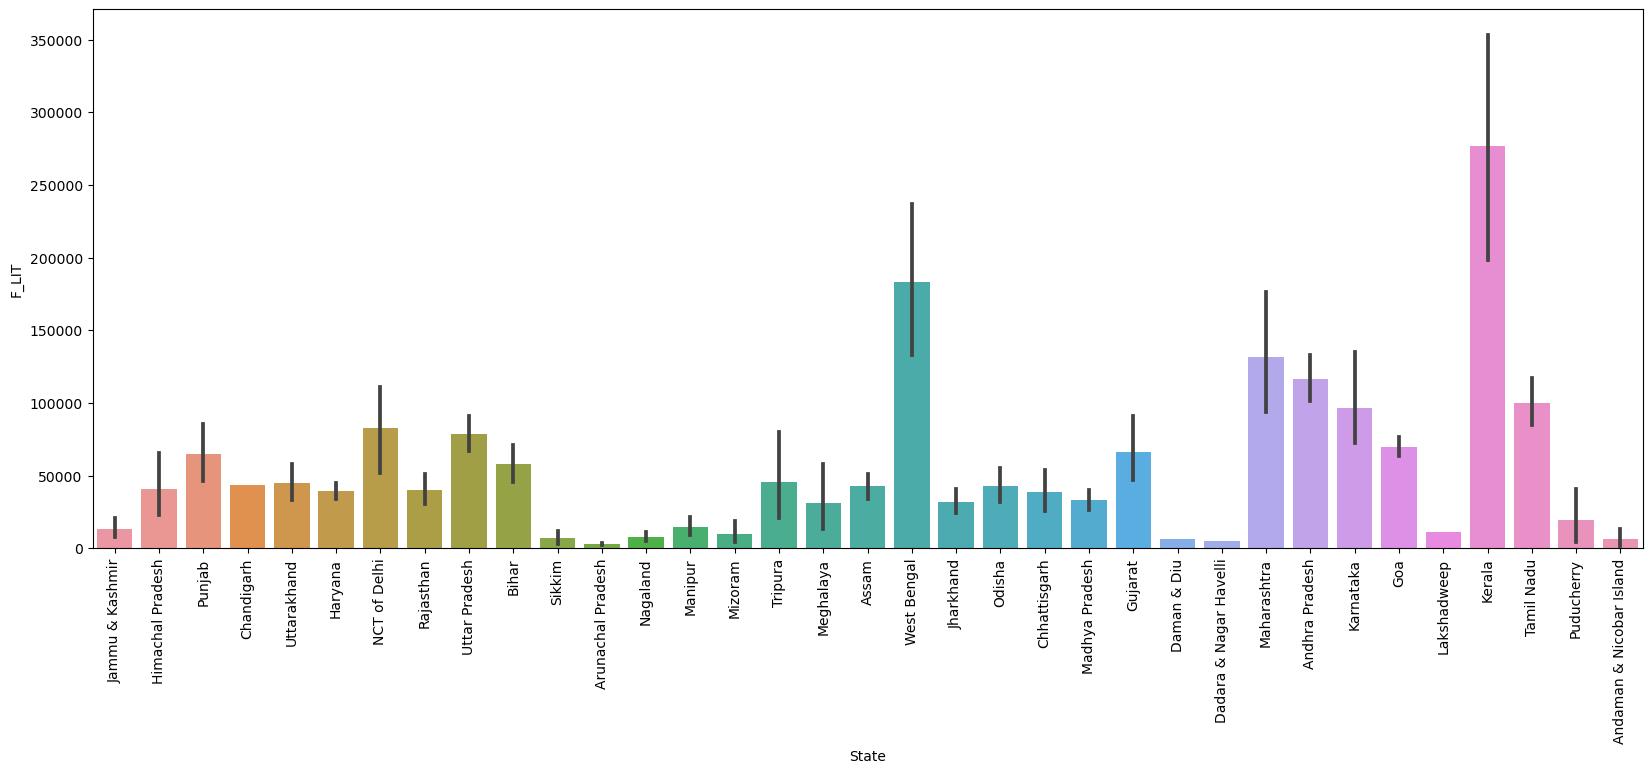

In [80]:
plt.figure(figsize=(20,7))
sns.barplot(data = df , x = 'State' , y = 'F_LIT');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Jammu & Kashmir'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Uttarakhand'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'NCT of Delhi'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Sikkim'),
  Text(11, 0, 'Arunachal Pradesh'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'West Bengal'),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'Madhya Pradesh'),
  Text(23, 0, 'Gujarat'),
  Text(24, 0, 'Daman & Diu'),
  Text(25, 0, 'Dadara & Nagar Havelli'),
  Text(26, 0, 'Maharashtra'),
  Text(27, 0, 'Andhra Pradesh'),
  Text(28, 0, 'Karnataka'

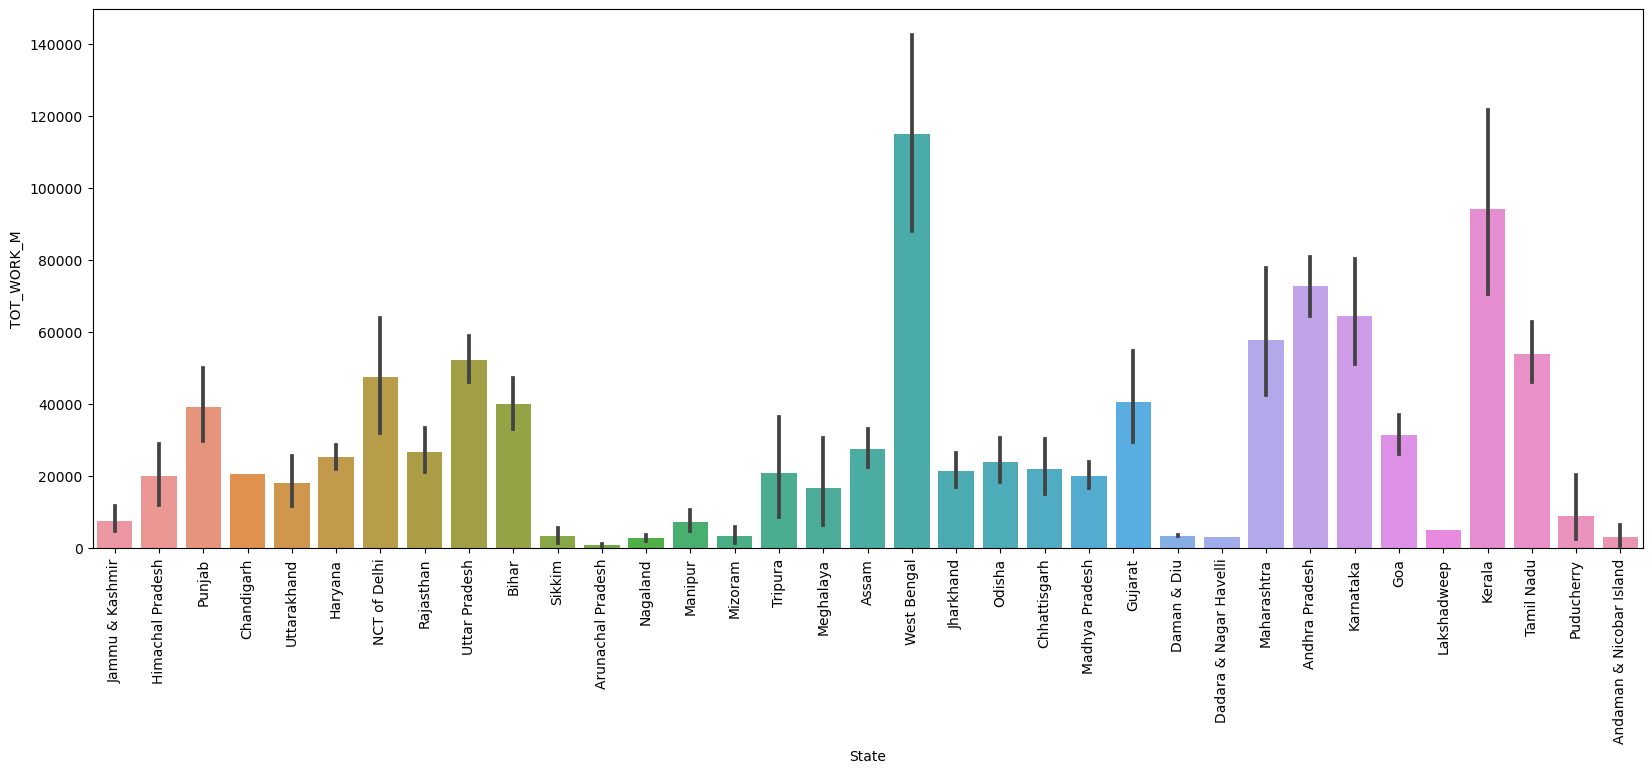

In [81]:
plt.figure(figsize=(20,7))
sns.barplot(data = df , x = 'State' , y = 'TOT_WORK_M');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Jammu & Kashmir'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Uttarakhand'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'NCT of Delhi'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Sikkim'),
  Text(11, 0, 'Arunachal Pradesh'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'West Bengal'),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'Madhya Pradesh'),
  Text(23, 0, 'Gujarat'),
  Text(24, 0, 'Daman & Diu'),
  Text(25, 0, 'Dadara & Nagar Havelli'),
  Text(26, 0, 'Maharashtra'),
  Text(27, 0, 'Andhra Pradesh'),
  Text(28, 0, 'Karnataka'

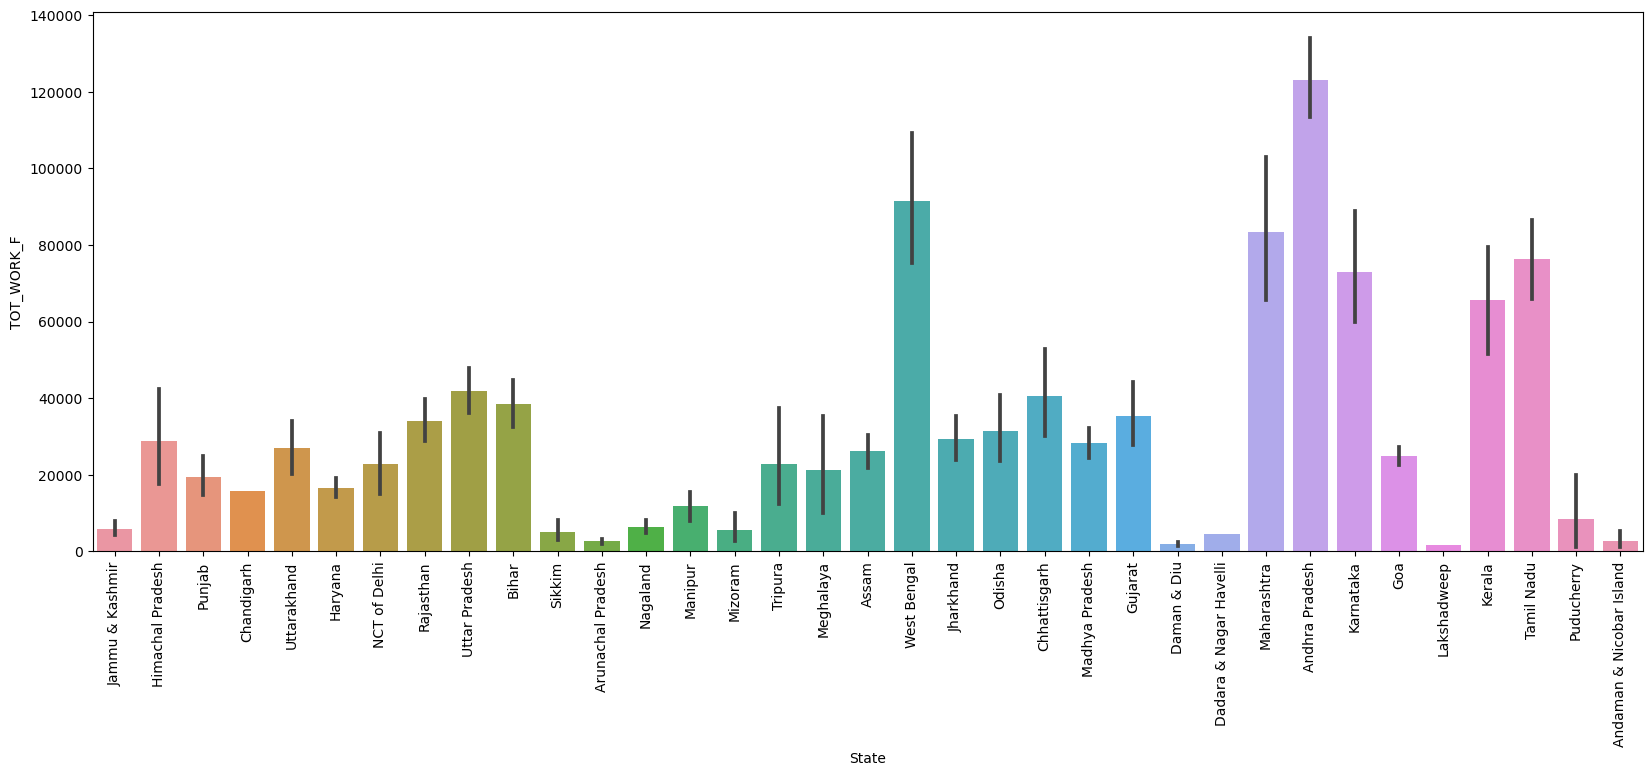

In [82]:
plt.figure(figsize=(20,7))
sns.barplot(data = df , x = 'State' , y = 'TOT_WORK_F');
plt.xticks(rotation=90)

In [84]:
df_new=df.drop(columns=['State','Area Name','State Code','Dist.Code'])
df_new.head()

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1   6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2   4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3   1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4  11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           1150            749            180            237            680   
1            525            715            123            229            186   
2            114            188             44             89              3   
3            194            247             61            128             13   
4            874           1928            465           1043            205   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0            252             32             46         258         214  
1            148             76            178         140         160  
2             34              0              4          67          61  
3             50              4             10         116          59  
4            302             24            105         180         478  

[5 rows x 57 columns]

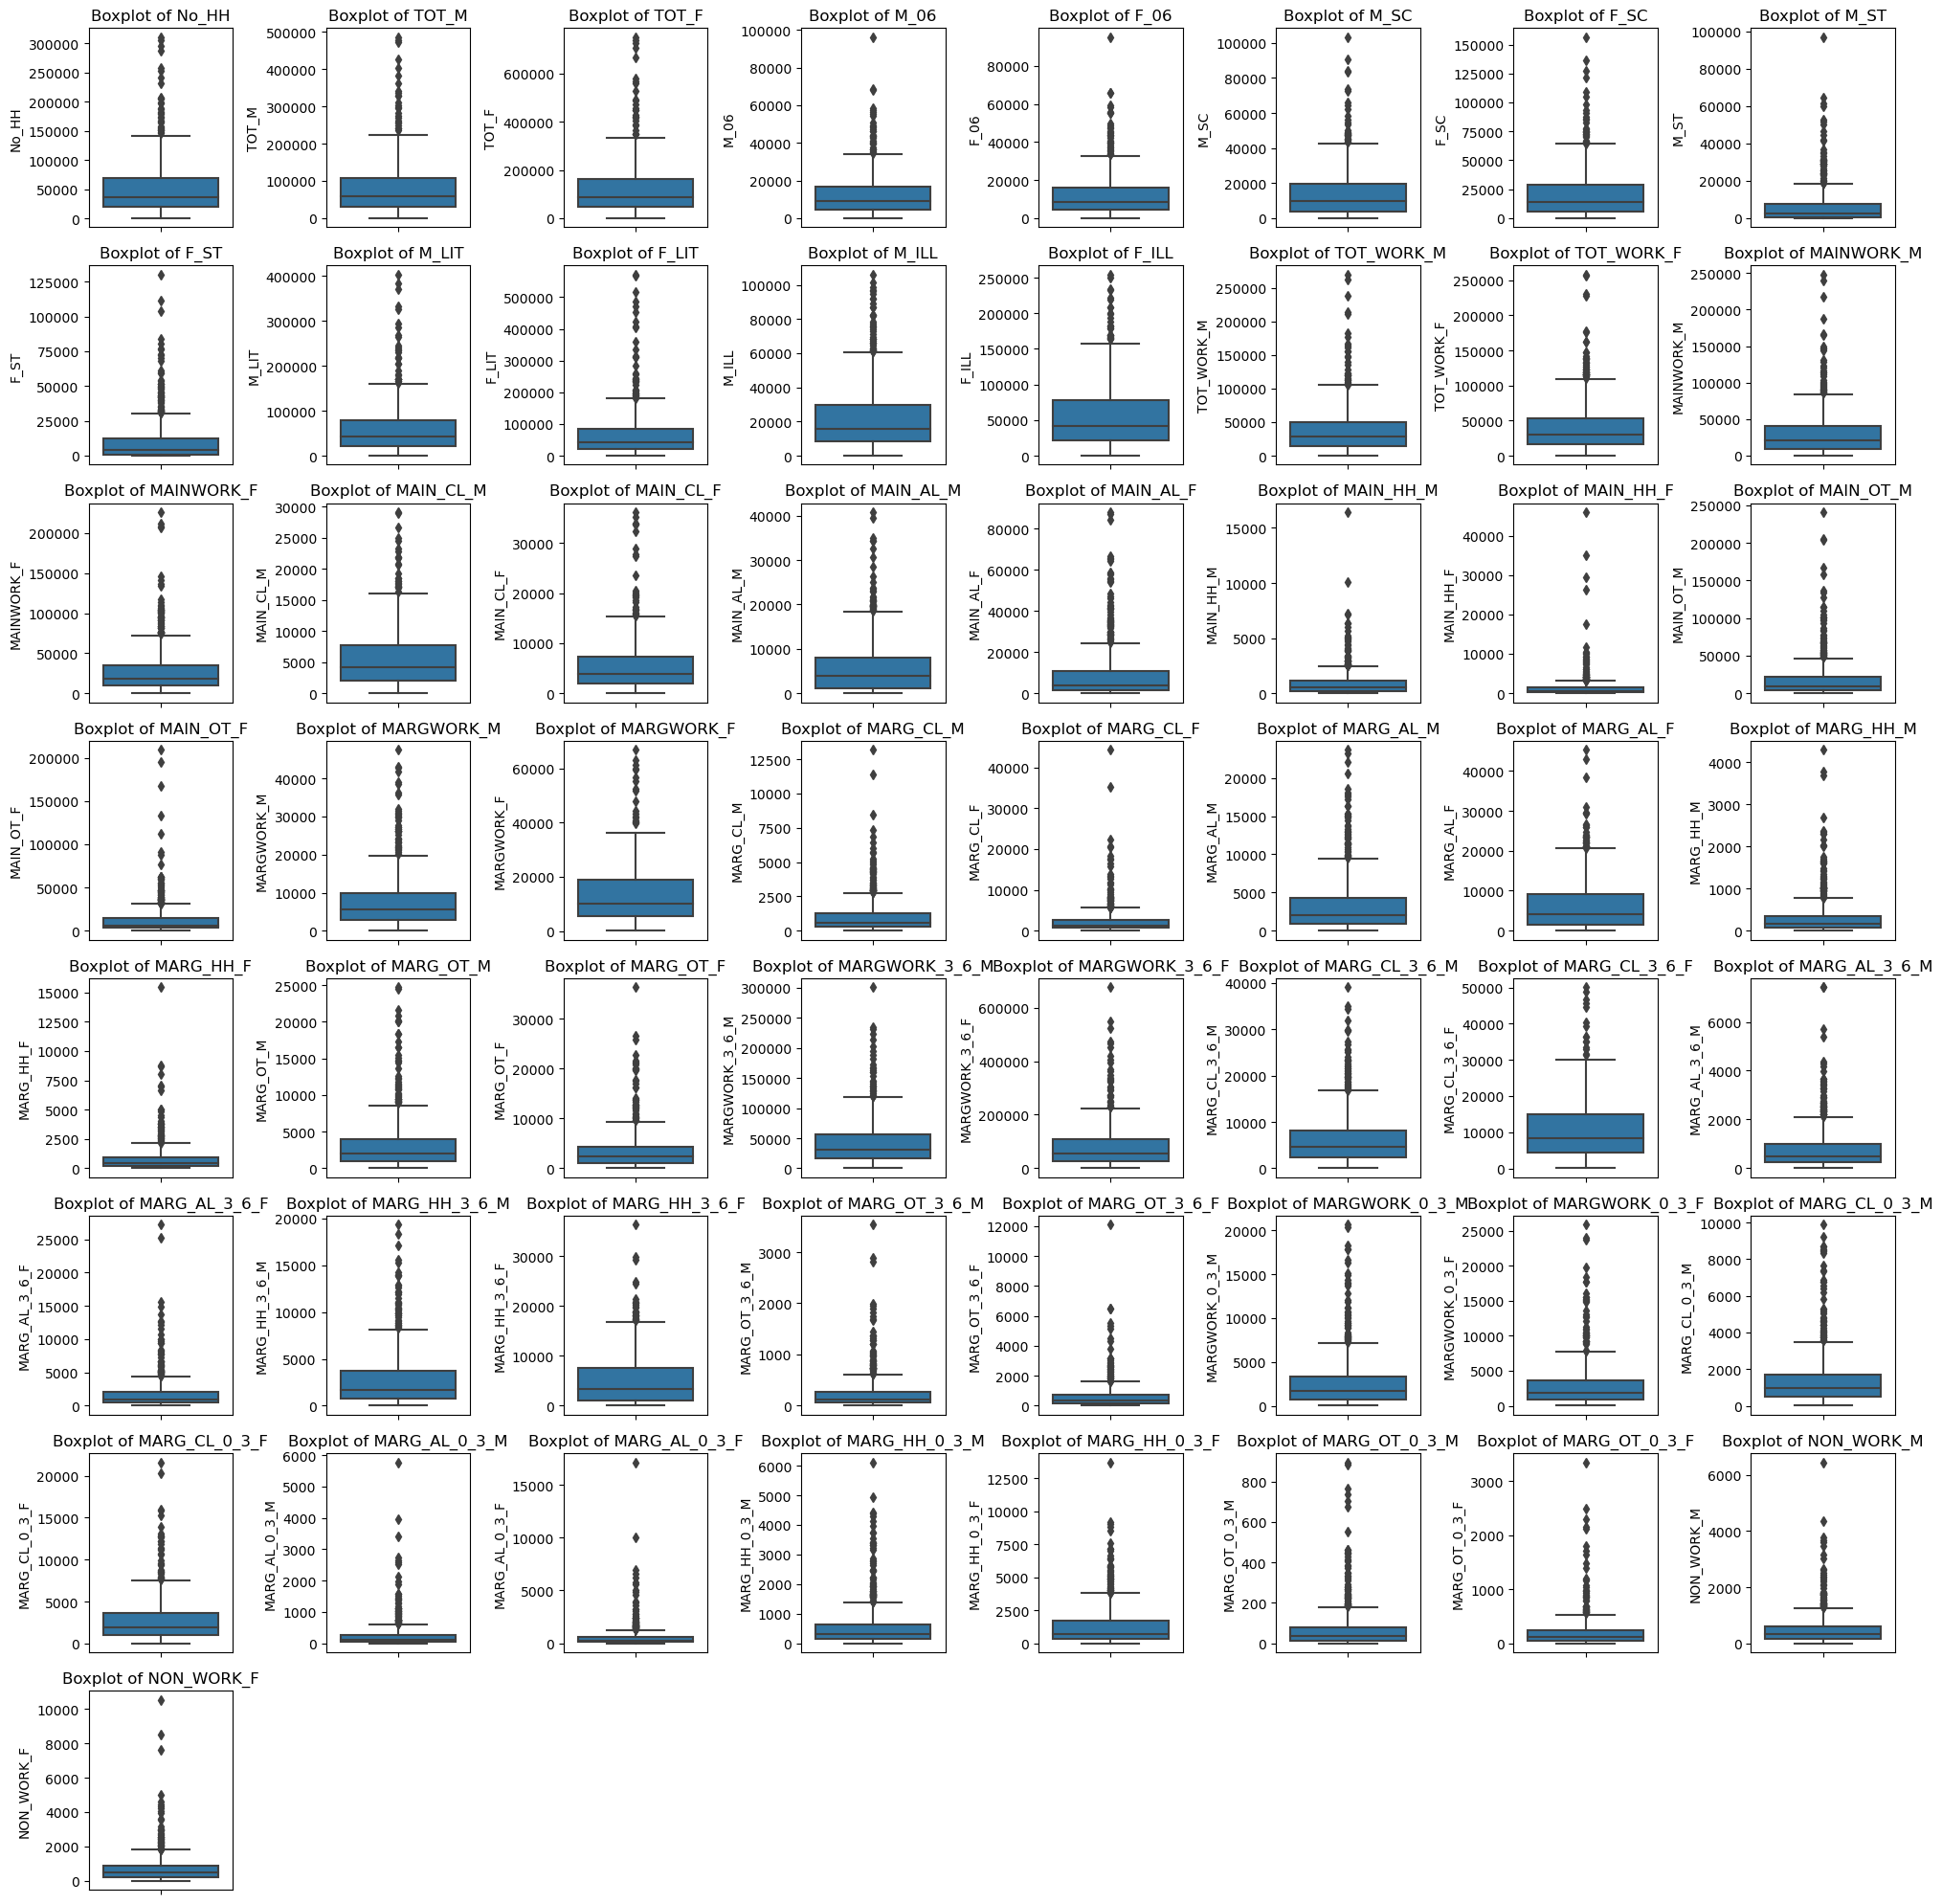

In [82]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,20))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(8 , 8 , i+1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [83]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [84]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_new[i])
    df_new[i] = np.where(df_new[i] > UL, UL, df_new[i])
    df_new[i] = np.where(df_new[i] < LL, LL, df_new[i])

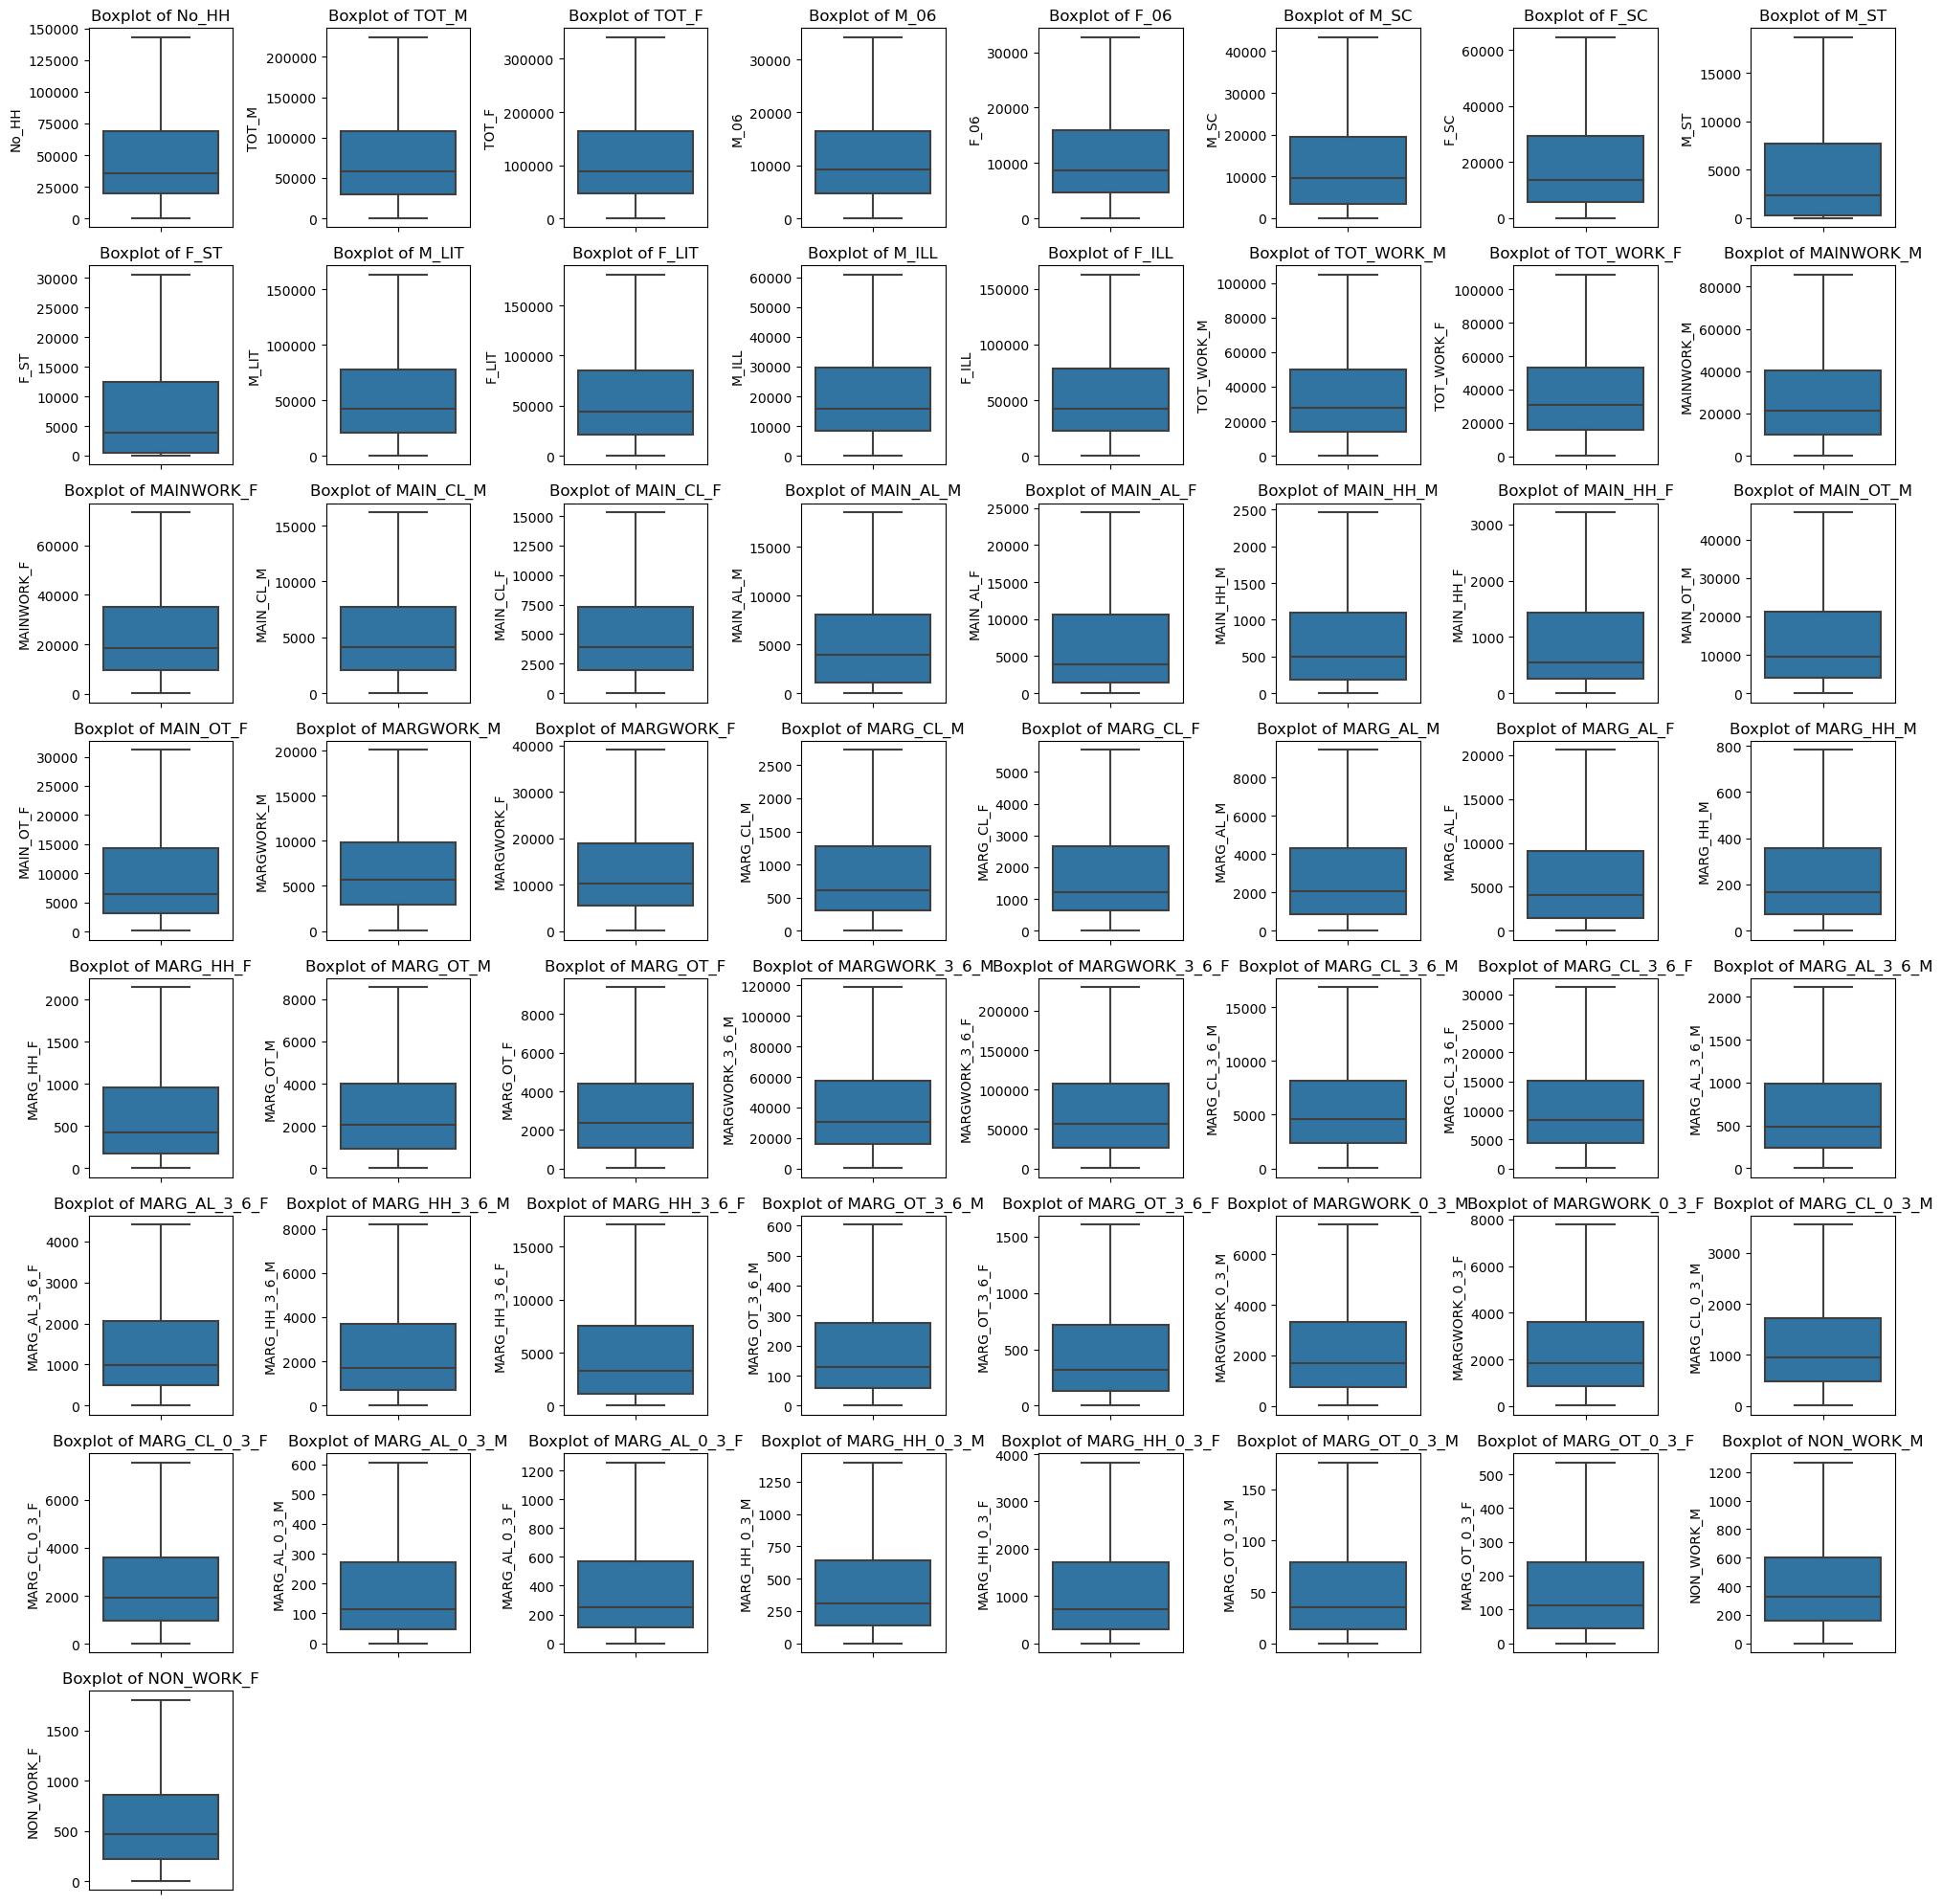

In [85]:
#Check to verify if outliers have been treated
plt.figure(figsize = (20,20))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(8 , 8 , i+1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Problem 2 - Data Preprocessing
#### - Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers

In [86]:
# checking for null values
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [87]:
#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 [Text(0, 0, 'No_HH'),
  Text(1, 0, 'TOT_M'),
  Text(2, 0, 'TOT_F'),
  Text(3, 0, 'M_06'),
  Text(4, 0, 'F_06'),
  Text(5, 0, 'M_SC'),
  Text(6, 0, 'F_SC'),
  Text(7, 0, 'M_ST'),
  Text(8, 0, 'F_ST'),
  Text(9, 0, 'M_LIT'),
  Text(10, 0, 'F_LIT'),
  Text(11, 0, 'M_ILL'),
  Text(12, 0, 'F_ILL'),
  Text(13, 0, 'TOT_WORK_M'),
  Text(14, 0, 'TOT_WORK_F'),
  Text(15, 0, 'MAINWORK_M'),
  Text(16, 0, 'MAINWORK_F'),
  Text(17, 0, 'MAIN_CL_M'),
  Text(18, 0, 'MAIN_CL_F'),
  Text(19, 0, 'MAIN_AL_M'),
  Text(20, 0, 'MAIN_AL_F'),
  Text(21, 0, 'MAIN_HH_M'),
  Text(22, 0, 'MAIN_HH_F'),
  Text(23, 0, 'MAIN_OT_M'),
  Text(24, 0, 'MAIN_OT_F'),
  Text(25, 0, 'MARGWORK_M'),
  Text(26, 0, 'MARGWORK_F'),
  Text(27, 0, 'MARG_CL_M'),
  Text(28, 0, 'M

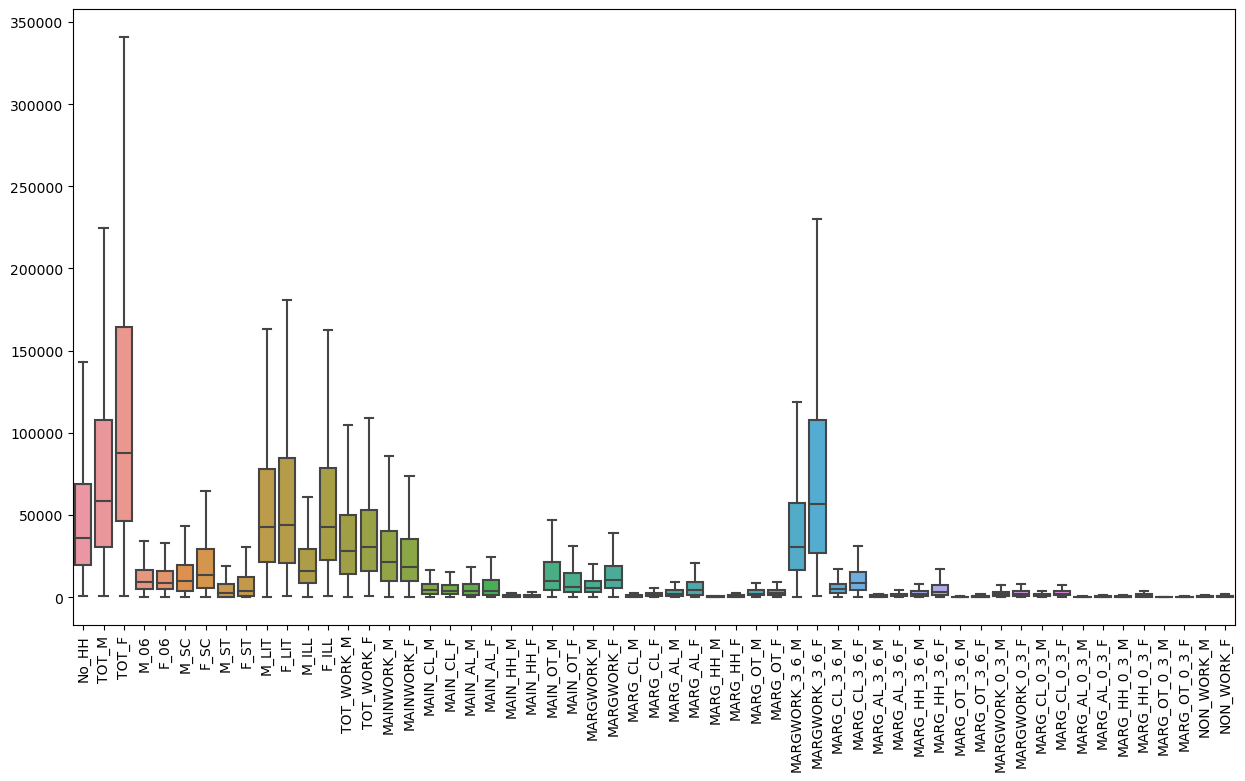

In [88]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df_new);
plt.xticks(rotation=90)

In [85]:
df_new.describe()

No_HH          TOT_M          TOT_F          M_06  \
count     640.000000     640.000000     640.000000    640.000000   
mean    51222.871875   79940.576563  122372.084375  12309.098438   
std     48135.405475   73384.511114  113600.717282  11500.906881   
min       350.000000     391.000000     698.000000     56.000000   
25%     19484.000000   30228.000000   46517.750000   4733.750000   
50%     35837.000000   58339.000000   87724.500000   9159.000000   
75%     68892.000000  107918.500000  164251.750000  16520.250000   
max    310450.000000  485417.000000  750392.000000  96223.000000   

               F_06           M_SC           F_SC          M_ST  \
count    640.000000     640.000000     640.000000    640.000000   
mean   11942.300000   13820.946875   20778.392188   6191.807813   
std    11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000       0.000000       0.000000      0.000000   
25%     4672.250000    3466.250000    5603.250000    293.750000   
50%     8663.000000    9591.500000   13709.000000   2333.500000   
75%    15902.250000   19429.750000   29180.000000   7658.000000   
max    95129.000000  103307.000000  156429.000000  96785.000000   

                F_ST          M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
count     640.000000     640.000000  ...     640.000000     640.000000   
mean    10155.640625   57967.979688  ...    1392.973438    2757.050000   
std     15875.701488   55910.282466  ...    1489.707052    2788.776676   
min         0.000000     286.000000  ...       4.000000      30.000000   
25%       429.500000   21298.000000  ...     489.500000     957.250000   
50%      3834.500000   42693.500000  ...     949.000000    1928.000000   
75%     12480.250000   77989.500000  ...    1714.000000    3599.750000   
max    130119.000000  403261.000000  ...    9875.000000   21611.000000   

       MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      250.889062     558.098438     560.690625    1293.431250   
std       453.336594    1117.642748     762.578991    1585.377936   
min         0.000000       0.000000       0.000000       0.000000   
25%        47.000000     109.000000     136.500000     298.000000   
50%       114.500000     247.500000     308.000000     717.000000   
75%       270.750000     568.750000     642.000000    1710.750000   
max      5775.000000   17153.000000    6116.000000   13714.000000   

       MARG_OT_0_3_M  MARG_OT_0_3_F   NON_WORK_M    NON_WORK_F  
count     640.000000     640.000000   640.000000    640.000000  
mean       71.379688     200.742188   510.014063    704.778125  
std       107.897627     309.740854   610.603187    910.209225  
min         0.000000       0.000000     0.000000      5.000000  
25%        14.000000      43.000000   161.000000    220.500000  
50%        35.000000     113.000000   326.000000    464.500000  
75%        79.000000     240.000000   604.500000    853.500000  
max       895.000000    3354.000000  6456.000000  10533.000000  

[8 rows x 57 columns]

In [88]:
# scaling the data
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)
df_scaled.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1 -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2 -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3 -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4  0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 57 columns]

In [90]:
df_scaled.describe().round(2)

No_HH   TOT_M   TOT_F    M_06    F_06    M_SC    F_SC    M_ST    F_ST  \
count  640.00  640.00  640.00  640.00  640.00  640.00  640.00  640.00  640.00   
mean     0.00   -0.00   -0.00   -0.00    0.00    0.00   -0.00   -0.00   -0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -1.06   -1.08   -1.07   -1.07   -1.05   -0.96   -0.96   -0.63   -0.64   
25%     -0.66   -0.68   -0.67   -0.66   -0.64   -0.72   -0.70   -0.60   -0.61   
50%     -0.32   -0.29   -0.31   -0.27   -0.29   -0.29   -0.33   -0.39   -0.40   
75%      0.37    0.38    0.37    0.37    0.35    0.39    0.39    0.15    0.15   
max      5.39    5.53    5.53    7.30    7.35    6.21    6.25    9.15    7.56   

        M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
count  640.00  ...         640.00         640.00         640.00   
mean    -0.00  ...          -0.00          -0.00           0.00   
std      1.00  ...           1.00           1.00           1.00   
min     -1.03  ...          -0.93          -0.98          -0.55   
25%     -0.66  ...          -0.61          -0.65          -0.45   
50%     -0.27  ...          -0.30          -0.30          -0.30   
75%      0.36  ...           0.22           0.30           0.04   
max      6.18  ...           5.70           6.77          12.19   

       MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
count         640.00         640.00         640.00         640.00   
mean           -0.00           0.00          -0.00          -0.00   
std             1.00           1.00           1.00           1.00   
min            -0.50          -0.74          -0.82          -0.66   
25%            -0.40          -0.56          -0.63          -0.53   
50%            -0.28          -0.33          -0.36          -0.34   
75%             0.01           0.11           0.26           0.07   
max            14.86           7.29           7.84           7.64   

       MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
count         640.00      640.00      640.00  
mean            0.00       -0.00       -0.00  
std             1.00        1.00        1.00  
min            -0.65       -0.84       -0.77  
25%            -0.51       -0.57       -0.53  
50%            -0.28       -0.30       -0.26  
75%             0.13        0.15        0.16  
max            10.19        9.75       10.81  

[8 rows x 57 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 [Text(0, 0, 'No_HH'),
  Text(1, 0, 'TOT_M'),
  Text(2, 0, 'TOT_F'),
  Text(3, 0, 'M_06'),
  Text(4, 0, 'F_06'),
  Text(5, 0, 'M_SC'),
  Text(6, 0, 'F_SC'),
  Text(7, 0, 'M_ST'),
  Text(8, 0, 'F_ST'),
  Text(9, 0, 'M_LIT'),
  Text(10, 0, 'F_LIT'),
  Text(11, 0, 'M_ILL'),
  Text(12, 0, 'F_ILL'),
  Text(13, 0, 'TOT_WORK_M'),
  Text(14, 0, 'TOT_WORK_F'),
  Text(15, 0, 'MAINWORK_M'),
  Text(16, 0, 'MAINWORK_F'),
  Text(17, 0, 'MAIN_CL_M'),
  Text(18, 0, 'MAIN_CL_F'),
  Text(19, 0, 'MAIN_AL_M'),
  Text(20, 0, 'MAIN_AL_F'),
  Text(21, 0, 'MAIN_HH_M'),
  Text(22, 0, 'MAIN_HH_F'),
  Text(23, 0, 'MAIN_OT_M'),
  Text(24, 0, 'MAIN_OT_F'),
  Text(25, 0, 'MARGWORK_M'),
  Text(26, 0, 'MARGWORK_F'),
  Text(27, 0, 'MARG_CL_M'),
  Text(28, 0, 'M

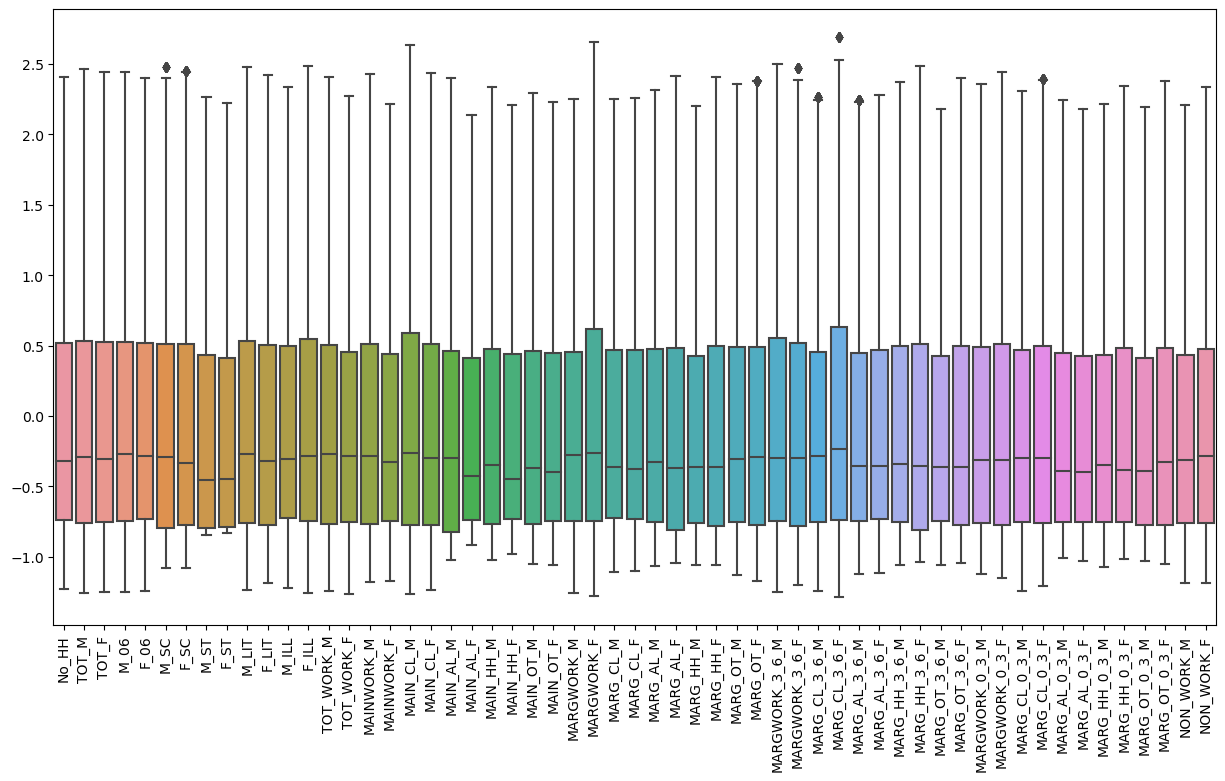

In [91]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df_scaled);
plt.xticks(rotation=90)

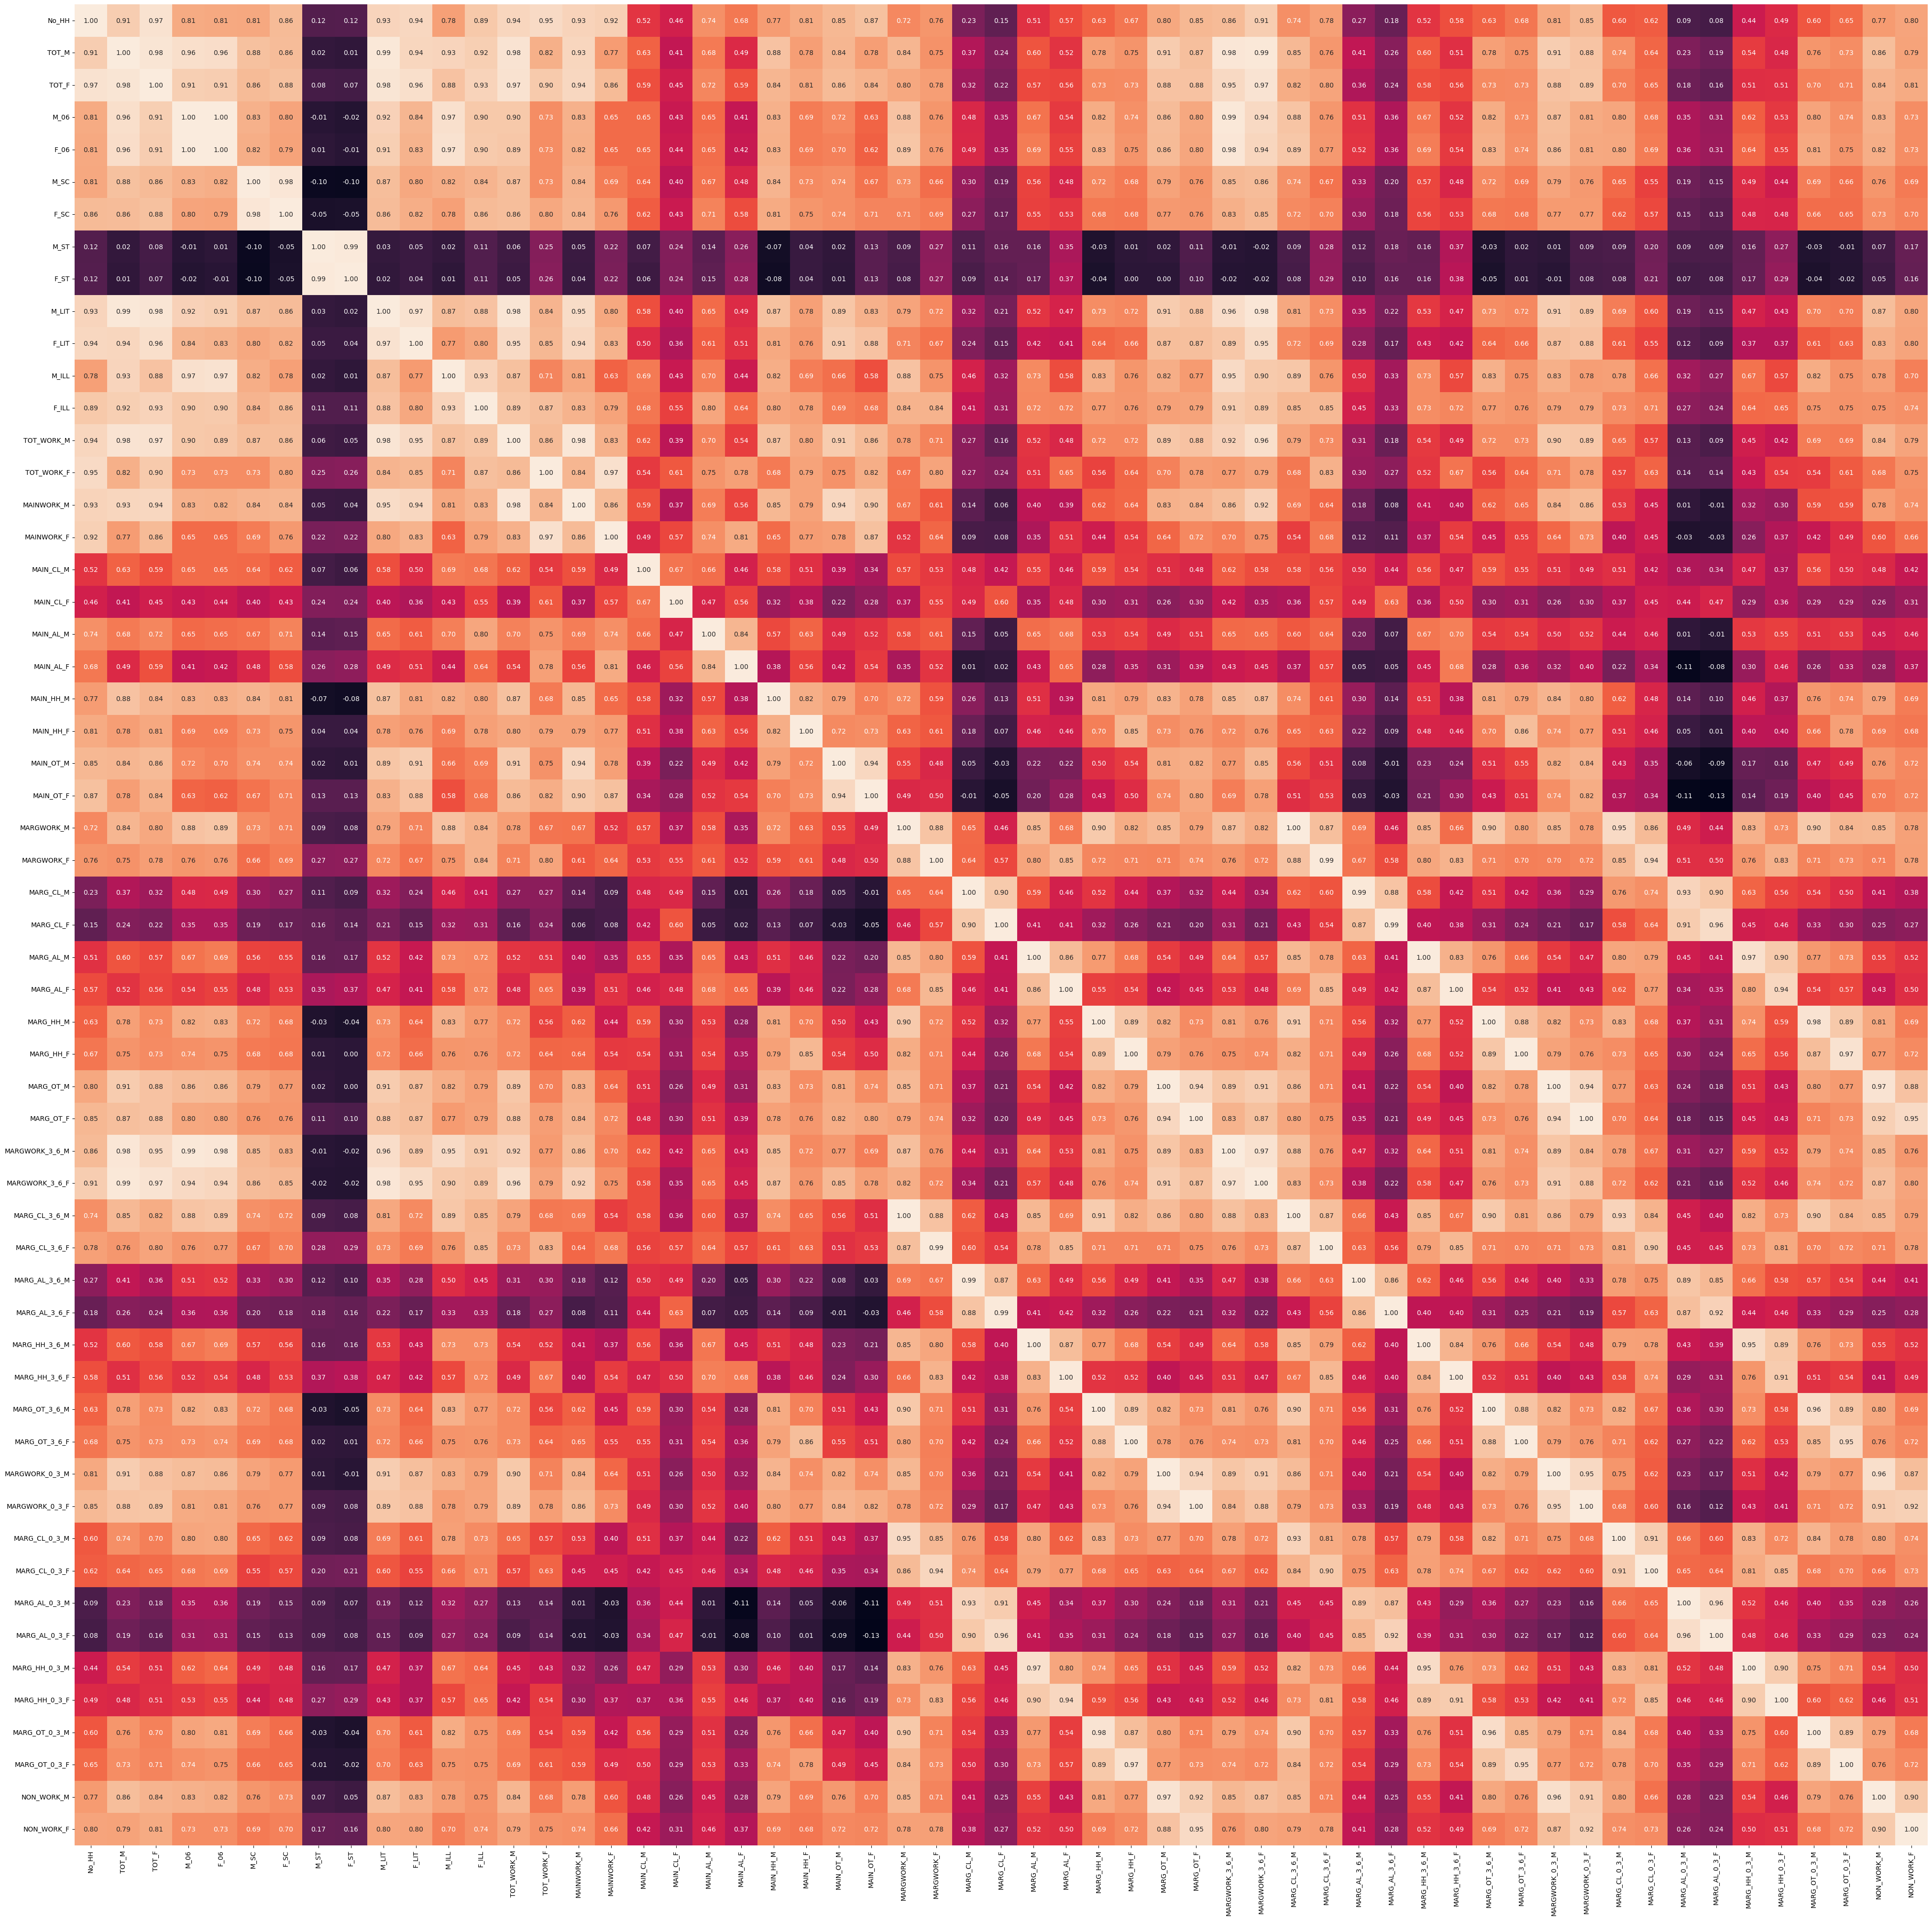

In [95]:
#Check for presence of correlations
plt.figure(figsize = (50,50))
sns.heatmap(df_scaled.corr(), annot=True,fmt='.2f',cbar=False);

### Problem 2 - PCA
#### - Create the covariance matrix - Get eigen values and eigen vectors - Identify the optimum number of PCs - Show Scree plot - Compare PCs with Actual Columns and identify which is explaining most variance - Write inferences about all the PCs in terms of actual variables - Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.

In [91]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

In [92]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8039889932781392

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [ 0.21, -0.03, -0.01, ...,  0.  ,  0.02,  0.02],
       [ 0.06, -0.  , -0.02, ..., -0.02, -0.  , -0.  ],
       [ 0.02, -0.  , -0.03, ..., -0.02, -0.02, -0.01]])

In [94]:
#Step 1: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.   -0.21  0.04 ... -0.21 -0.04  0.05]
 [-0.08  0.08  0.05 ...  0.09 -0.32  0.22]
 [ 0.64  0.03 -0.22 ... -0.01  0.01 -0.02]]


In [95]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


In [96]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.  ]


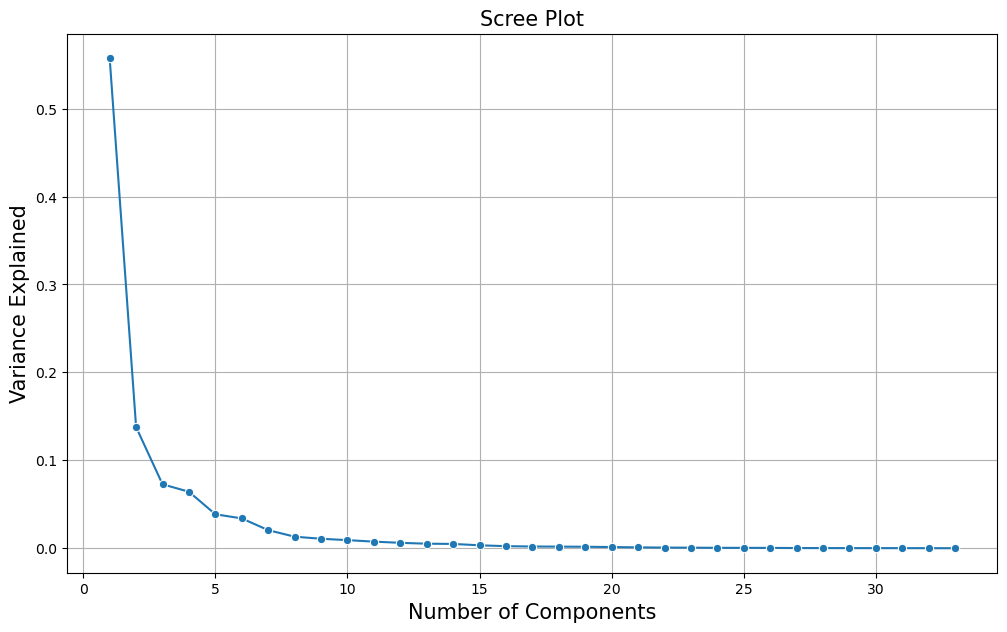

In [97]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [98]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 13 PCA dimensions (dimensionality reduction from 33 to 10)
pca = PCA(n_components=10, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose().round(2) # Component output

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [ 0.48, -0.01,  0.04, ..., -0.04,  0.06,  0.1 ],
       [ 0.05,  0.42,  0.16, ...,  0.19,  0.09,  0.16],
       [-0.04, -0.19,  0.01, ...,  0.03,  0.02, -0.06]])

In [99]:
df_pca.shape

(640, 10)

In [100]:
print("Covariance matrix : \n", np.cov(df_pca))

Covariance matrix : 
 [[2.65384958 2.71559682 3.0810424  ... 3.32705346 3.26012156 3.09943089]
 [2.71559682 2.95818195 3.21927718 ... 3.52898196 3.42192001 3.25382599]
 [3.0810424  3.21927718 3.85909673 ... 4.05405594 3.96445766 3.77161732]
 ...
 [3.32705346 3.52898196 4.05405594 ... 4.36443144 4.25265838 4.05275828]
 [3.26012156 3.42192001 3.96445766 ... 4.25265838 4.15880459 3.96567682]
 [3.09943089 3.25382599 3.77161732 ... 4.05275828 3.96567682 3.79502824]]


In [101]:
# Loading of each feature on the components
# Eigen Vectors when PC's are kept as 10
print("Eigen Vector : \n", pca.components_.round(2))

Eigen Vector : 
 [[ 0.16  0.17  0.17  0.16  0.16  0.15  0.15  0.03  0.03  0.16  0.15  0.16
   0.17  0.16  0.15  0.15  0.12  0.1   0.07  0.11  0.07  0.13  0.08  0.12
   0.11  0.16  0.16  0.08  0.05  0.13  0.11  0.14  0.13  0.16  0.15  0.16
   0.16  0.17  0.16  0.09  0.05  0.13  0.11  0.14  0.12  0.15  0.15  0.15
   0.14  0.05  0.04  0.12  0.12  0.14  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  -0.02 -0.02 -0.05 -0.05  0.03  0.03 -0.12 -0.15 -0.01
  -0.01 -0.13 -0.09 -0.18 -0.15  0.06  0.09 -0.03 -0.06 -0.08 -0.08 -0.21
  -0.21  0.09  0.13  0.27  0.25  0.17  0.14  0.07  0.02 -0.09 -0.12 -0.04
  -0.11  0.08  0.1   0.26  0.24  0.16  0.13  0.06  0.01 -0.09 -0.13  0.15
   0.18  0.25  0.24  0.19  0.18  0.08  0.05 -0.07 -0.07]
 [-0.    0.06  0.04  0.06  0.05  0.   -0.03 -0.12 -0.14  0.08  0.12 -0.02
  -0.09  0.05 -0.06  0.05 -0.06 -0.07 -0.01 -0.25 -0.25  0.03 -0.06  0.14
   0.1  -0.01 -0.05  0.2   0.27 -0.19 -0.27 -0.02 -0.08  0.11  0.1   0.06
   0.08 -0.02 -0.07  0.15  0.26 -0.2  -0.28 -0.02 -0.08

In [102]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [104]:
#Check the explained variance for each PC. 
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
# It gives the Eigen Values when PC's are kept at 10
print("Eigen values of all 10 pc's : \n", pca.explained_variance_ratio_.round(2))

Eigen values of all 10 pc's : 
 [0.56 0.14 0.07 0.06 0.04 0.03 0.02 0.01 0.01 0.01]


In [105]:
# Component loading when PC's are kept as 5
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_scaled))
df_pca_loading.shape

(10, 57)

In [106]:
df_pca_loading.head()

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  M_LIT  ...  \
0   0.16   0.17   0.17  0.16  0.16  0.15  0.15  0.03  0.03   0.16  ...   
1  -0.13  -0.09  -0.10 -0.02 -0.02 -0.05 -0.05  0.03  0.03  -0.12  ...   
2  -0.00   0.06   0.04  0.06  0.05  0.00 -0.03 -0.12 -0.14   0.08  ...   
3  -0.13  -0.02  -0.07  0.01  0.01  0.01 -0.03 -0.22 -0.23  -0.04  ...   
4  -0.01  -0.03  -0.01 -0.05 -0.04 -0.17 -0.16  0.43  0.44  -0.01  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           0.15           0.14           0.05           0.04           0.12   
1           0.15           0.18           0.25           0.24           0.19   
2           0.05           0.02           0.27           0.28          -0.14   
3           0.09          -0.02          -0.10          -0.14           0.13   
4           0.08           0.13          -0.05          -0.05           0.06   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0           0.12           0.14           0.13        0.15        0.13  
1           0.18           0.08           0.05       -0.07       -0.07  
2          -0.20          -0.02          -0.08        0.11        0.10  
3           0.00           0.23           0.21        0.08        0.02  
4           0.13          -0.04           0.00        0.16        0.24  

[5 rows x 57 columns]

In [107]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10'],
                                    index = df_scaled.columns)

In [108]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083   
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389   
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647   
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957   
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436   
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007 -0.064295   
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803 -0.040518   
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163  0.222591   
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792  0.225531   
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101 -0.055465   
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844 -0.048021   
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580 -0.115234   
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119911 -0.028757   
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553 -0.001801   
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437  0.105162   
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802  0.019283   
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834  0.123832   
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039 -0.006170   
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936  0.102951   
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724 -0.031068   
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605  0.019240   
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089  0.174465   
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441  0.422309   
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638  0.023477   
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743  0.083079   
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244 -0.090761   
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202  0.017868   
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263  0.031915   
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205  0.092086   
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422 -0.141605   
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527 -0.085120   
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971  0.089533   
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602  0.365112   
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121 -0.061066   
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882  0.001739   
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834 -0.136253   
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537 -0.106900   
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073 -0.096708   
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050  0.023773   
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789  0.013477   
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303  0.093993   
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457 -0.144061   
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109 -0.076708   
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400  0.097057   
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810  0.384552   
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829 -0.062043   
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190  0.008962   
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185 -0.060715   
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936 -0.001727   
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849  0.065409   
MARG_AL_0_3_F   0.041786  0.240720  0.28495

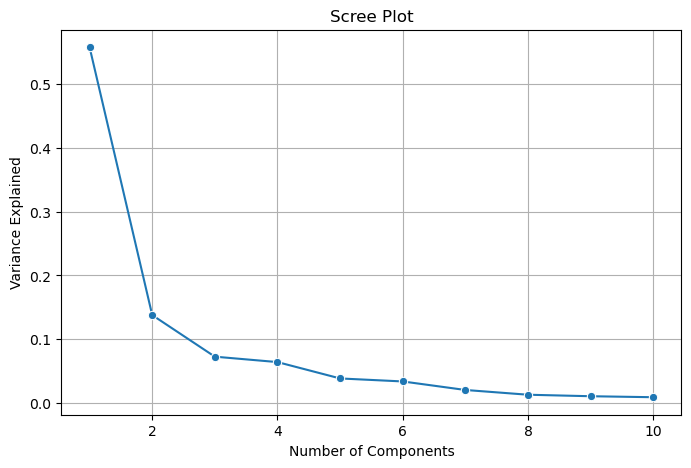

In [109]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,11),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [110]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687])

In [111]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]
df_selected

PC1       PC2       PC3       PC4       PC5
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119911
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849
MARG_AL_0_3_F   0.041786  0.240720  0.284956 -0.135716 -0.051895
MARG_HH_0_3_M   0.121840  0.185277 -0.138628  0.132544  0.062380
MARG_HH_0_3_F   0.116011  0.180616 -0.202198  0.004051  0.128308
MARG_OT_0_3_M   0.139869  0.084869 -0.022599  0.230038 -0.036390
MARG_OT_0_3_F   0.132192  0.050813 -0.078720  0.206201  0.000165
NON_WORK_M      0.150376 -0.065365  0.111827  0.084854  0.162862
NON_WORK_F      0.131066 -0.073847  0.102553  0.021124  0.238292

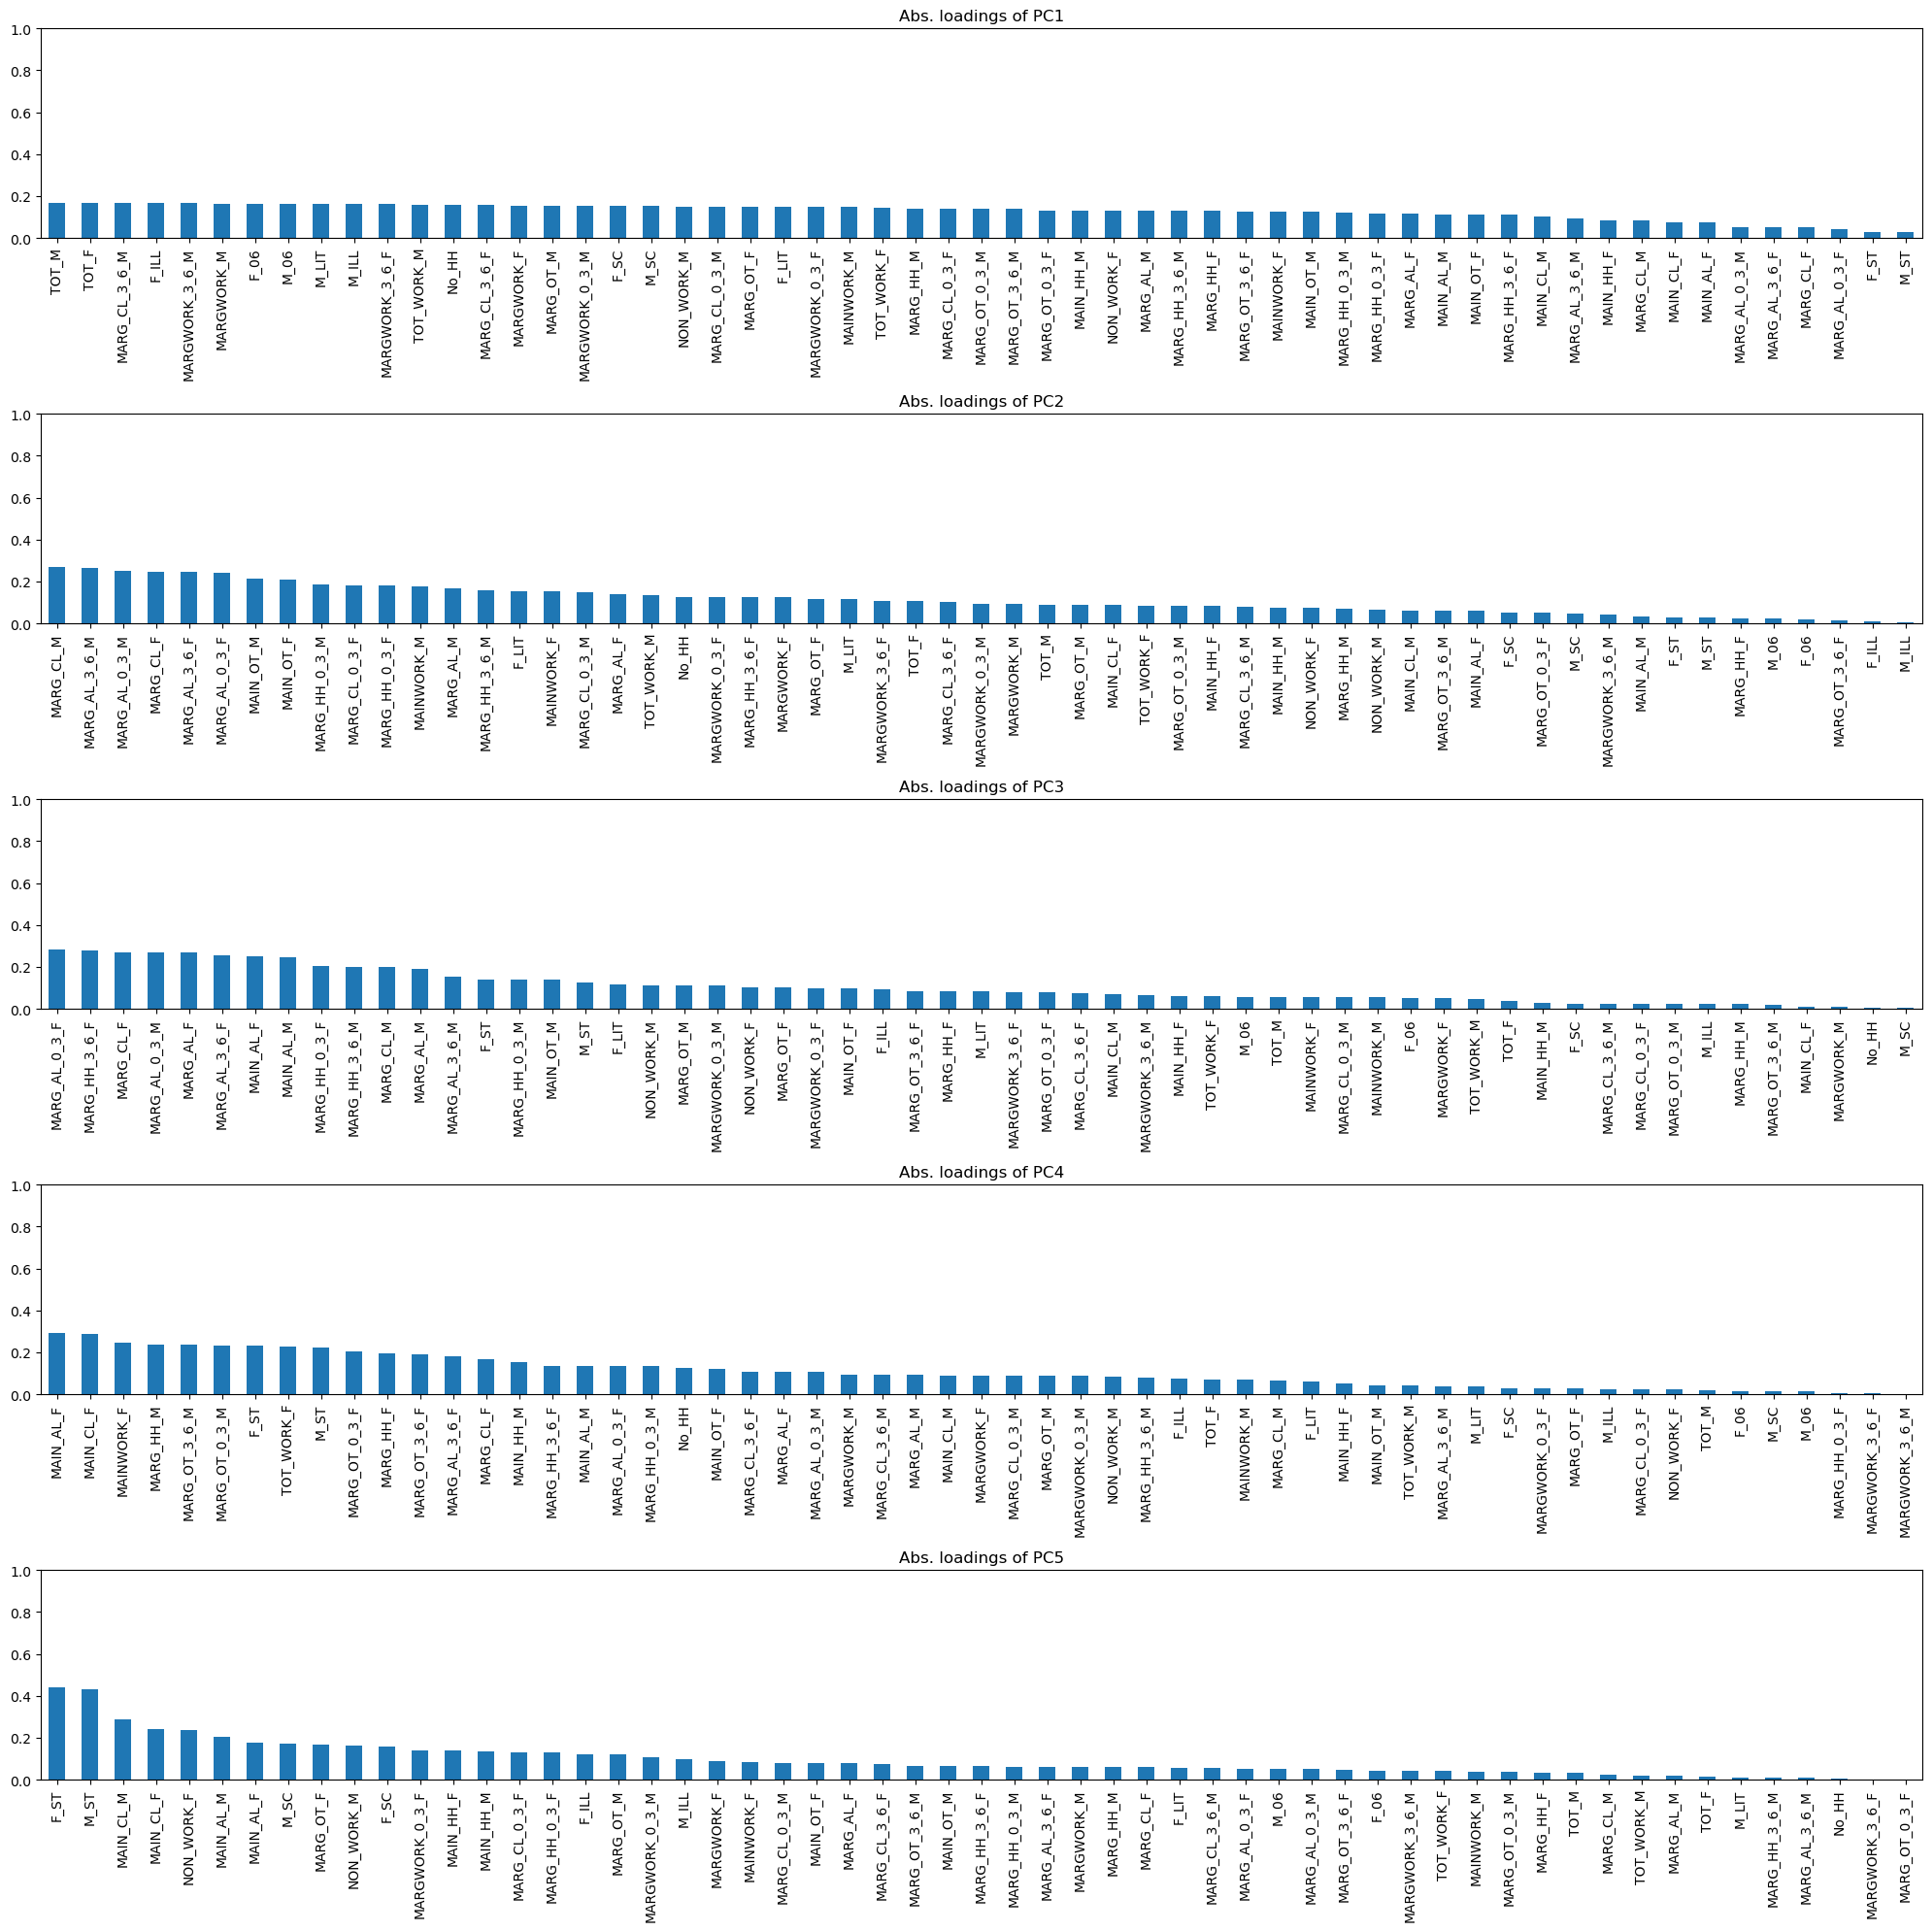

In [112]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,20))
for i in range(len(df_selected.columns)):
    plt.subplot(5,1,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

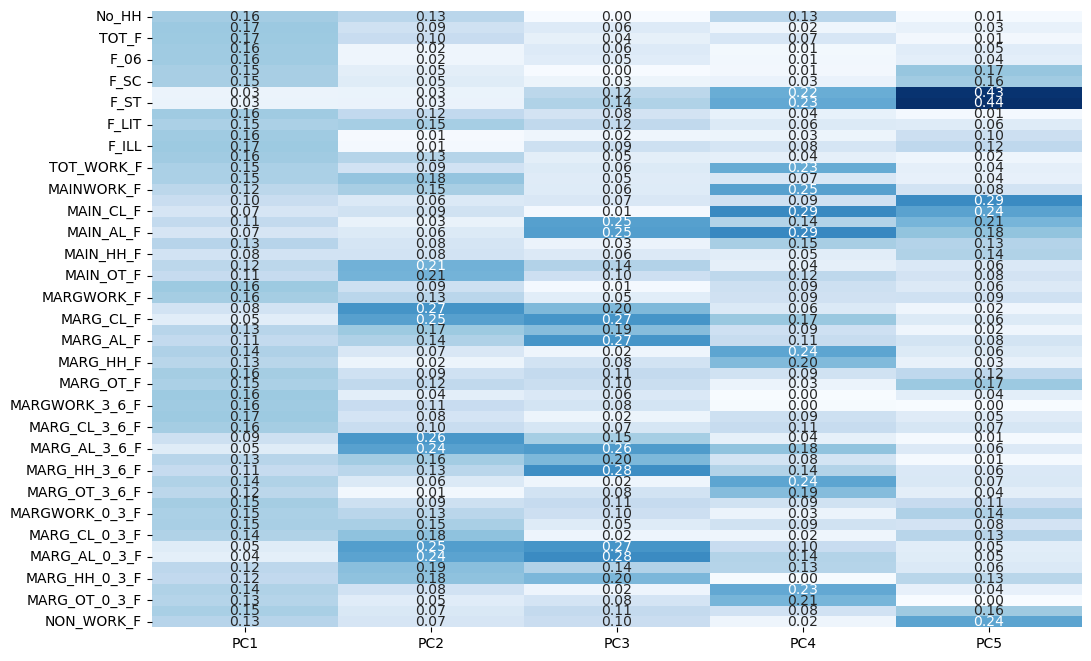

In [113]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f',cbar=False);

In [114]:
#In order to calculate PC scores we need loadings, below:
df_selected

PC1       PC2       PC3       PC4       PC5
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119911
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849
MARG_AL_0_3_F   0.041786  0.240720  0.284956 -0.135716 -0.051895
MARG_HH_0_3_M   0.121840  0.185277 -0.138628  0.132544  0.062380
MARG_HH_0_3_F   0.116011  0.180616 -0.202198  0.004051  0.128308
MARG_OT_0_3_M   0.139869  0.084869 -0.022599  0.230038 -0.036390
MARG_OT_0_3_F   0.132192  0.050813 -0.078720  0.206201  0.000165
NON_WORK_M      0.150376 -0.065365  0.111827  0.084854  0.162862
NON_WORK_F      0.131066 -0.073847  0.102553  0.021124  0.238292

In [115]:
#...and we need the original scaled features
df_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [116]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.617263 0.138116 0.328545 1.543697 0.353737 

In [117]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_scaled)

In [118]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5
0 -4.617263  0.138116  0.328545  1.543697  0.353737
1 -4.771662 -0.105865  0.244449  1.963215 -0.153884
2 -5.964836 -0.294347  0.367393  0.619543  0.478199
3 -6.280796 -0.500384  0.212701  1.074516  0.300799
4 -4.478566  0.894154  1.078277  0.535556  0.804065
5 -3.319963  2.823865  3.058460 -0.447906  0.742446
6 -5.021393 -0.346359  0.650378  0.981072 -0.059778
7 -4.608709  0.022370  0.398755  1.576995  0.171317
8 -5.186703 -0.059097  0.184397  1.735440  0.169174
9 -4.226190 -1.335080  0.697838  1.470509  0.269147

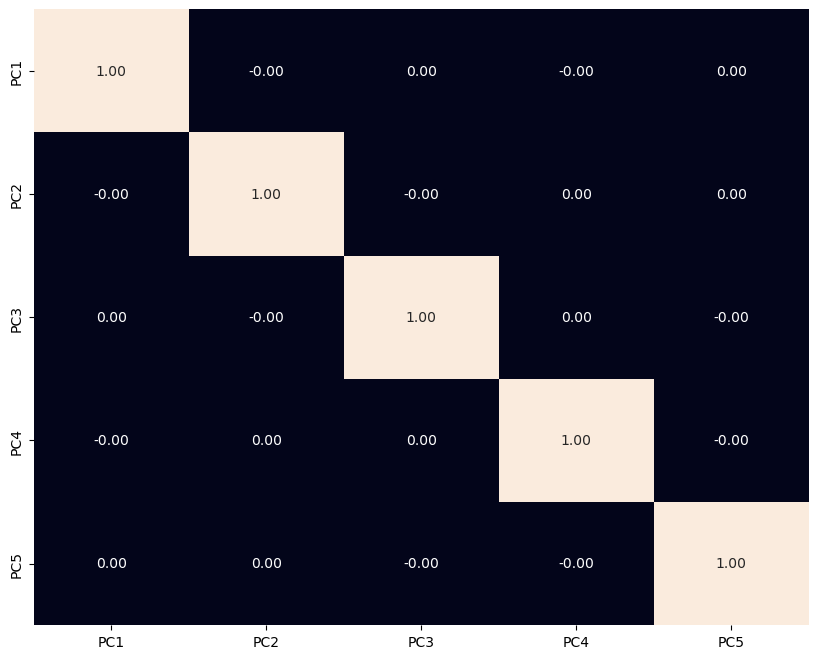

In [119]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f',cbar=False);